<!DOCTYPE html>
<html>

<head>
    <style>
        body {
            margin: 0;
            padding: 0;
            font-family: Georgia, serif;
        }

        .header {
            background-image: linear-gradient(to left, rgb(255, 255, 255), rgba(138, 136, 136, 0.5));
            padding: 10px;
            text-align: center;
        }

        .logo {
            width: 100px;
            height: auto;
            margin: 0 auto;
        }

        .course-title {
            background-image: linear-gradient(to left, rgb(255, 255, 255), rgb(219, 204, 245));
            padding: 10px;
            text-align: center;
            color: black;
        }

        .project-title {
            border: 3px solid green;
            padding: 10px;
            text-align: center;
            color: black;
        }

        .student-info {
            text-align: center;
            color: black;
        }

        .student-info h1 {
            font-size: 15px;
        }
    </style>
</head>

<body>
    <div class="header">
        <img class="logo" src="https://upload.wikimedia.org/wikipedia/en/thumb/f/fd/University_of_Tehran_logo.svg/225px-University_of_Tehran_logo.svg.png" alt="University of Tehran Logo">
    </div>

    <div class="course-title">
        <h1>Course: Data Science</h1>
    </div>

    <div class="project-title">
        <h1>Project 01: Introduction to Data Science</h1>
    </div>

    <div class="student-info">
        <h1>Shahzad Momayez - 810100272</h1>
        <h1>Mohammad Amanlou- 810100084</h1>
        <h1>Amir Mahdi Farzaneh- 810100194</h1>
    </div>
</body>

</html>


   
<div style="background-image: linear-gradient(to left, rgb(255, 255, 255), rgb(138, 136, 136)); width: auto; margin: 10px;">
  <img src="https://upload.wikimedia.org/wikipedia/en/thumb/f/fd/University_of_Tehran_logo.svg/225px-University_of_Tehran_logo.svg.png" width=100px width=auto style="padding:10px; vertical-align: center;">

</div>
   
<div   style:"text-align: center; background-image: linear-gradient(to left, rgb(255, 255, 255), rgb( 219, 204, 245  ));width: 400px; height: 30px; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">Course: Data Science </h1>

</div>
    <div   style:"border: 3px solid green;text-align: center; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">CA5-Introduction to Data Science</h1>
        <h1 style="font-family: Georgia; color: black; text-align: center; ">Team memebers:</h1>

</div>

<div>    
<h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Shahzad Momayez- 810100272 </h1>
<h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Mohammad Amanlou- 810100084 </h1>
<h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Amir Mahdi Farzaneh- 810100194 </h1>

</div>
   </html>

#  The Purpose Of The Assignment
In this task, you will need to utilize feature engineering methods on a soccer dataset to evaluate the probability of scoring a goal from a shot. Following that, you will explore the principles of regression and cross-validation by implementing multivariate regression and k-fold cross-validation from the ground up. These techniques will be applied to a processed dataset relating to cars. Finally, you will compare the results you achieve with those obtained using Python's standard libraries. This exercise will enhance your understanding of these concepts and their real-world application.


In [124]:
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/CA2-DS')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<html>
    <div  style="font-family: Georgia ;background-image: linear-gradient(to left,  rgb(255, 255, 255), rgba(127, 170, 225,0.8)); width: auto; margin: 10px;"> <h1> Part1: Preprocessing </h1>
    </div>
</html>

## checking main structure

In [125]:
import pandas as pd
df = pd.read_csv("football.csv")

In [126]:
df.head(10)

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
0,m_91,p_103,open play,right foot,13.47,-11.22,1,0,medium,70,9,goal
1,m_17,p_16,open play,left foot,9.48,14.22,3,0,medium,55,4,saved by keeper
2,m_111,p_88,free kick,left foot,29.43,-1.25,6,2,low,86,31,saved by keeper
3,m_142,p_87,open play,right foot,26.93,1.00,4,1,medium,77,2,missed chance
4,m_117,p_9,open play,right foot,10.72,5.24,2,0,medium,76,46,goal
5,m_147,p_118,open play,head,5.49,-1.50,1,0,low,40,15,missed chance
6,m_88,p_101,open play,head,14.46,-1.25,3,0,medium,88,8,missed chance
7,m_66,p_61,open play,head,8.98,4.99,1,0,low,10,29,missed chance
8,m_132,p_84,open play,left foot,23.44,-1.25,3,0,medium,58,45,blocked shot
9,m_99,p_30,open play,left foot,8.48,3.99,2,1,medium,43,55,blocked shot


In [127]:
df.describe()

,x,y,interveningOpponents,interveningTeammates,minute,second
count,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000
mean,14.564631,0.364408,2.531989,0.336471,48.541401,29.243810
std,7.841865,8.999063,1.386693,0.680175,26.397998,17.306565
min,0.000000,-33.920000,0.000000,0.000000,0.000000,0.000000
25%,8.480000,-5.740000,2.000000,0.000000,26.000000,14.000000
50%,12.470000,0.500000,2.000000,0.000000,49.000000,29.000000
75%,20.950000,6.730000,3.000000,0.000000,71.000000,44.000000
max,70.820000,33.920000,11.000000,7.000000,98.000000,59.000000


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8925 entries, 0 to 8924
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   matchId                8925 non-null   object 
 1   playerId               8925 non-null   object 
 2   playType               8925 non-null   object 
 3   bodyPart               8925 non-null   object 
 4   x                      8925 non-null   float64
 5   y                      8925 non-null   float64
 6   interveningOpponents   8925 non-null   int64  
 7   interveningTeammates   8925 non-null   int64  
 8   interferenceOnShooter  8891 non-null   object 
 9   minute                 8925 non-null   int64  
 10  second                 8925 non-null   int64  
 11  outcome                8891 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 836.8+ KB


## check categorical columns unique values

In [129]:
df['playType'].unique()

array(['open play', 'free kick', 'penalty', 'olimpico'], dtype=object)

In [130]:
df['bodyPart'].unique()

array(['right foot', 'left foot', 'head', 'other'], dtype=object)

In [131]:
df['interferenceOnShooter'].unique()

array(['medium', 'low', 'high', nan], dtype=object)

In [132]:
df['outcome'].unique()

array(['goal', 'saved by keeper', 'missed chance', 'blocked shot',
       'hit the post', nan], dtype=object)

## handle missing values

In [133]:
nan_rows = df[df.isnull().any(axis=1)]

In [134]:
nan_rows

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
434,m_153,p_22,open play,right foot,9.23,-1.25,1,0,NaN,33,48,NaN
953,m_124,p_70,open play,right foot,2.74,1.00,1,0,NaN,90,18,NaN
1123,m_29,p_11,open play,right foot,3.74,-0.75,1,0,NaN,74,36,NaN
1160,m_88,p_77,open play,other,4.74,-2.74,3,1,NaN,43,3,NaN
1317,m_203,p_27,open play,left foot,3.24,-5.99,1,0,NaN,32,20,NaN
1582,m_130,p_127,open play,other,3.74,-5.24,1,0,NaN,64,7,NaN
2080,m_218,p_146,open play,left foot,8.98,1.00,1,0,NaN,50,31,NaN
2157,m_179,p_73,open play,right foot,3.74,2.99,1,0,NaN,17,38,NaN
2357,m_178,p_26,open play,head,2.49,2.24,1,0,NaN,16,12,NaN
2473,m_225,p_9,open play,right foot,12.72,-1.50,2,0,NaN,22,38,NaN


In [135]:
df=df.dropna(how='any', axis=0)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8891 entries, 0 to 8924
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   matchId                8891 non-null   object 
 1   playerId               8891 non-null   object 
 2   playType               8891 non-null   object 
 3   bodyPart               8891 non-null   object 
 4   x                      8891 non-null   float64
 5   y                      8891 non-null   float64
 6   interveningOpponents   8891 non-null   int64  
 7   interveningTeammates   8891 non-null   int64  
 8   interferenceOnShooter  8891 non-null   object 
 9   minute                 8891 non-null   int64  
 10  second                 8891 non-null   int64  
 11  outcome                8891 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 903.0+ KB


In [137]:
df[df.isnull().any(axis=1)]

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome


## convert categoricals to numerical

In [138]:
df['goal'] = df['outcome'].replace(to_replace=['missed chance', 'saved by keeper', 'missed chance', 'blocked shot', 'hit the post', 'nan'],
                 value=0)
df['goal'] = df['goal'].replace(to_replace=['goal'],
                 value=1)

In [139]:
!pip install flaml

In [140]:
from fast_automl.automl import AutoClassifier

from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score, train_test_split


In [141]:
X = df.select_dtypes('number')
X = X.drop(['goal', 'interveningOpponents'], axis=1)
# X = X.drop('openPlay', axis=1)
y = df['goal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [142]:
from flaml import AutoML
automl = AutoML(task="classification", eval_metric="roc_auc")
automl.fit(X_train=X_train, y_train=y_train, time_budget=10, estimator_list=['lgbm'])

''' retrieve best model and best configuration found'''
print('Best ML model:', automl.model)

[flaml.automl.logger: 05-13 20:02:46] {1680} INFO - task = classification
[flaml.automl.logger: 05-13 20:02:46] {1691} INFO - Evaluation method: holdout
[flaml.automl.logger: 05-13 20:02:46] {1789} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 05-13 20:02:46] {1901} INFO - List of ML learners in AutoML Run: ['lgbm']
[flaml.automl.logger: 05-13 20:02:46] {2219} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 05-13 20:02:46] {2345} INFO - Estimated sufficient time budget=224s. Estimated necessary time budget=0s.
[flaml.automl.logger: 05-13 20:02:46] {2392} INFO -  at 0.1s,	estimator lgbm's best error=0.2955,	best estimator lgbm's best error=0.2955
[flaml.automl.logger: 05-13 20:02:46] {2219} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 05-13 20:02:46] {2392} INFO -  at 0.1s,	estimator lgbm's best error=0.2955,	best estimator lgbm's best error=0.2955
[flaml.automl.logger: 05-13 20:02:46] {2219} INFO - iteration 2, current learner lgbm
[fl

In [143]:
print("auc_roc :", 76.6)

auc_roc : 76.6


In [144]:
df['openPlay'] = df['playType'].replace(to_replace=['free kick', 'penalty', 'olimpico'],
                 value=0)
df['openPlay'] = df['openPlay'].replace(to_replace=['open play'],
                 value=1)

In [145]:
df['interferenceOnShooterValue'] = df['interferenceOnShooter'].replace(['low', 'medium', 'high'],
                 [0,1,2])

## correlation matrix with impactfull features on goal

In [146]:
import matplotlib.pyplot as plt

In [147]:
import seaborn as sns

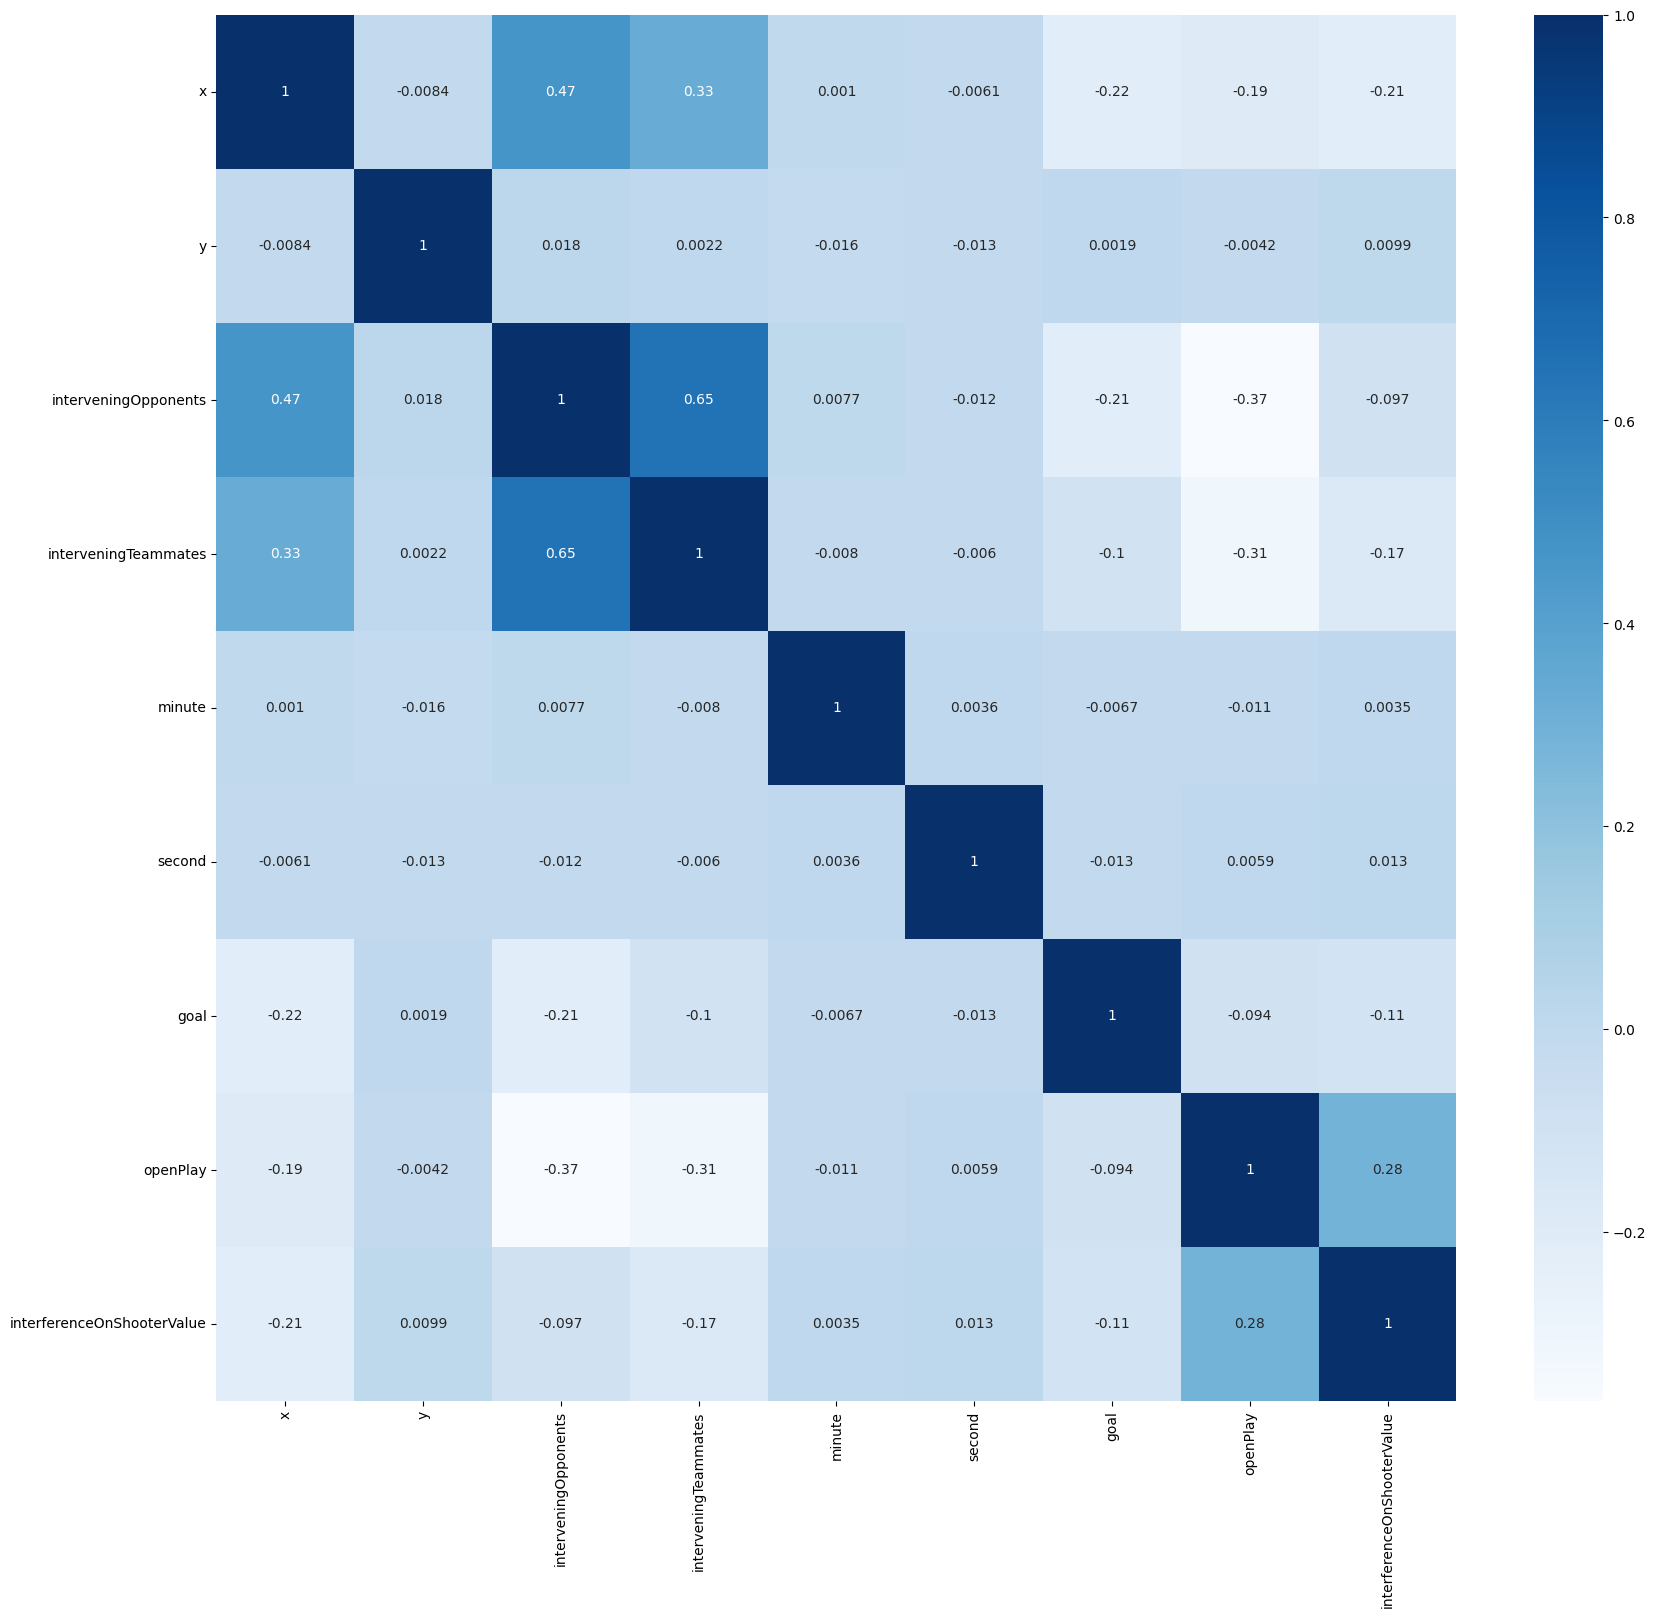

In [148]:
correlation_matrix = df.select_dtypes('number').corr()
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.show()

As we see above, doesn't exist scignificant correlation with goal status

0.65 is correlation of intervering opponents and teammate opponents

## olyimpico goal!!!

In [149]:
df[df['playType'] == 'olimpico'].head()

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome,goal,openPlay,interferenceOnShooterValue
802,m_2,p_132,olimpico,left foot,0.25,-33.92,2,0,low,76,49,hit the post,0,0,0
1720,m_214,p_109,olimpico,right foot,0.00,33.92,3,0,low,61,30,hit the post,0,0,0
2160,m_131,p_20,olimpico,right foot,0.25,33.92,4,2,low,33,22,goal,1,0,0
5357,m_100,p_65,olimpico,head,7.98,1.25,4,0,high,27,28,goal,1,0,2


Just two goal was olimpico.

The width of the playground is recognizable.

Also directions of playgound.

## train random forest and logistic regression model before feature engineering

In [150]:
df['playTypeValue'] = df['playType'].replace(['open play', 'free kick', 'penalty', 'olimpico'],
                 value=[0,1,2,3])

In [151]:
X = df.select_dtypes('number')
X = X.drop(['goal', 'interveningOpponents'], axis=1)
X = X.drop('openPlay', axis=1)
y = df['goal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [152]:
X.head()

,x,y,interveningTeammates,minute,second,interferenceOnShooterValue,playTypeValue
0,13.47,-11.22,0,70,9,1,0
1,9.48,14.22,0,55,4,1,0
2,29.43,-1.25,2,86,31,0,1
3,26.93,1.00,1,77,2,1,0
4,10.72,5.24,0,76,46,1,0


Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1958
           1       0.53      0.15      0.24       265

    accuracy                           0.88      2223
   macro avg       0.71      0.57      0.59      2223
weighted avg       0.85      0.88      0.85      2223

AUC-ROC Score: 0.5665340065912463


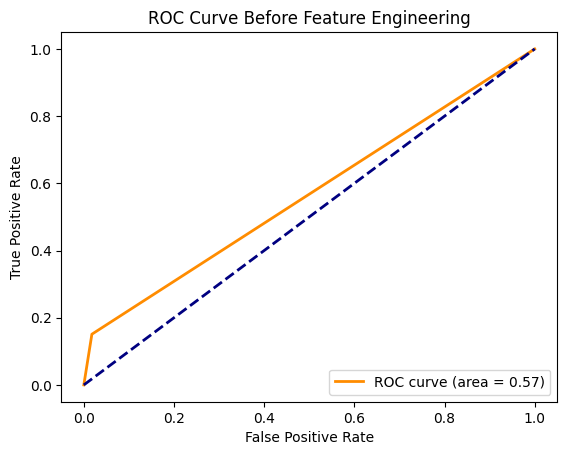

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
def run_random_forest(X,y,status):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

  rf_model = RandomForestClassifier(n_estimators=10, random_state=42)

  rf_model.fit(X_train, y_train)

  y_pred = rf_model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy: {accuracy:.2f}")
  print(classification_report(y_test, y_pred))

  auc_roc = roc_auc_score(y_test, y_pred)
  print("AUC-ROC Score:", auc_roc)

  # Step 8: Plot the ROC curve
  fpr, tpr, _ = roc_curve(y_test, y_pred)
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_roc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  if(status == 'after'):
    plt.title('ROC Curve After Feature Engineering')
  else:
    plt.title('ROC Curve Before Feature Engineering')
  plt.legend(loc="lower right")
plt.show()
run_random_forest(X,y,'before')

In [154]:
def logistic_regression(X,y):
  from sklearn.linear_model import LogisticRegression

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

  # Initialize logistic regression model
  model = LogisticRegression(max_iter=5)

  # Train the model
  model.fit(X_train, y_train)

  # Evaluate model performance
  accuracy = model.score(X_test, y_test)
  print(f"Accuracy: {accuracy:.2f}")
logistic_regression(X,y)

Accuracy: 0.88


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [155]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1564
           1       0.87      0.09      0.17       215

    accuracy                           0.89      1779
   macro avg       0.88      0.55      0.55      1779
weighted avg       0.89      0.89      0.85      1779



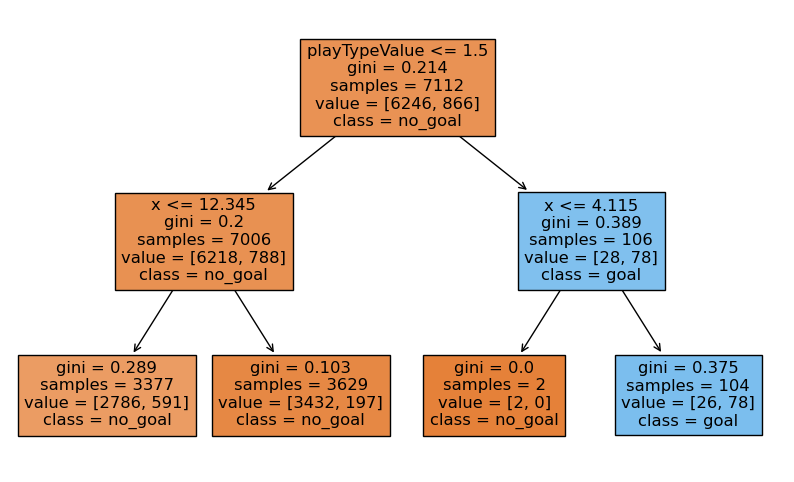

AUC-ROC Score: 0.5455525486230892


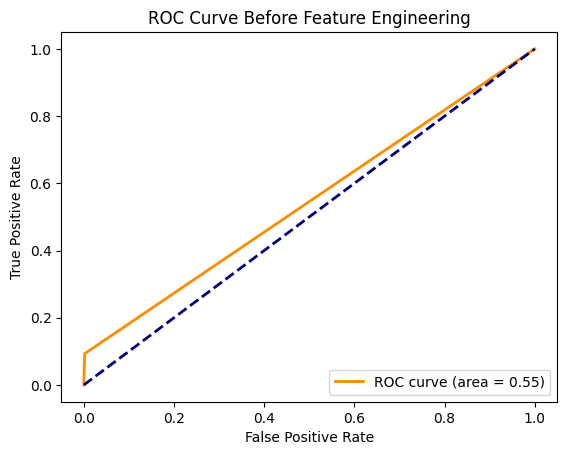

In [156]:
def decision_tree(X,y,status):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Initialize decision tree classifier
  model = DecisionTreeClassifier(max_depth=2)


  # Train the model
  model.fit(X_train, y_train)

  # Make predictions
  y_pred = model.predict(X_test)

  # Evaluate model performance
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy: {accuracy:.2f}")

  # Classification report
  print(classification_report(y_test, y_pred))
  plt.figure(figsize=(10, 6))
  plot_tree(model, filled=True, feature_names=X.columns, class_names=['no_goal','goal'])
  plt.show()

  auc_roc = roc_auc_score(y_test, y_pred)
  print("AUC-ROC Score:", auc_roc)

  # Step 8: Plot the ROC curve
  fpr, tpr, _ = roc_curve(y_test, y_pred)
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_roc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  if(status == 'after'):
    plt.title('ROC Curve After Feature Engineering')
  else:
    plt.title('ROC Curve Before Feature Engineering')
  plt.legend(loc="lower right")

decision_tree(X,y,'before')

## feature engineering

In [157]:
from numpy import sqrt

In [158]:
squared_x = pow(df['x'], 2)
squared_y = pow(df['y'], 2)
sum_sq_x_y = squared_x + squared_y

In [159]:
df_new = df.copy()

In [160]:
df_new['distance'] = sqrt(sum_sq_x_y)
df_new['is_near']=0
df_new['is_near'][df_new['distance']<13] = 1
df_new['is_near'][df_new['distance']>=13] = 0

<ipython-input-160-6dd180113277>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['is_near'][df_new['distance']<13] = 1
<ipython-input-160-6dd180113277>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['is_near'][df_new['distance']>=13] = 0


In [161]:
df_new['angle'] = 7.32*df_new['x'] / (squared_x + squared_y - pow(3.66,2))

In [162]:
shooted_from_right = df['y'] > 5

In [163]:
shooted_from_left = df['y'] < -5

In [164]:
right_foot = df['bodyPart'] == 'right foot'

In [165]:
left_foot = df['bodyPart'] == 'left foot'

In [166]:
a = shooted_from_right & left_foot
b = shooted_from_left & right_foot
c = (-5 < df['y']) & (df['y'] < 5)

In [167]:
df_new['correct_side'] = a|b|c

In [168]:
df_new['correct_side'] = df_new['correct_side'].replace([True,False],[1,0])

In [169]:
correlation_matrix = df_new.select_dtypes('number').corr()

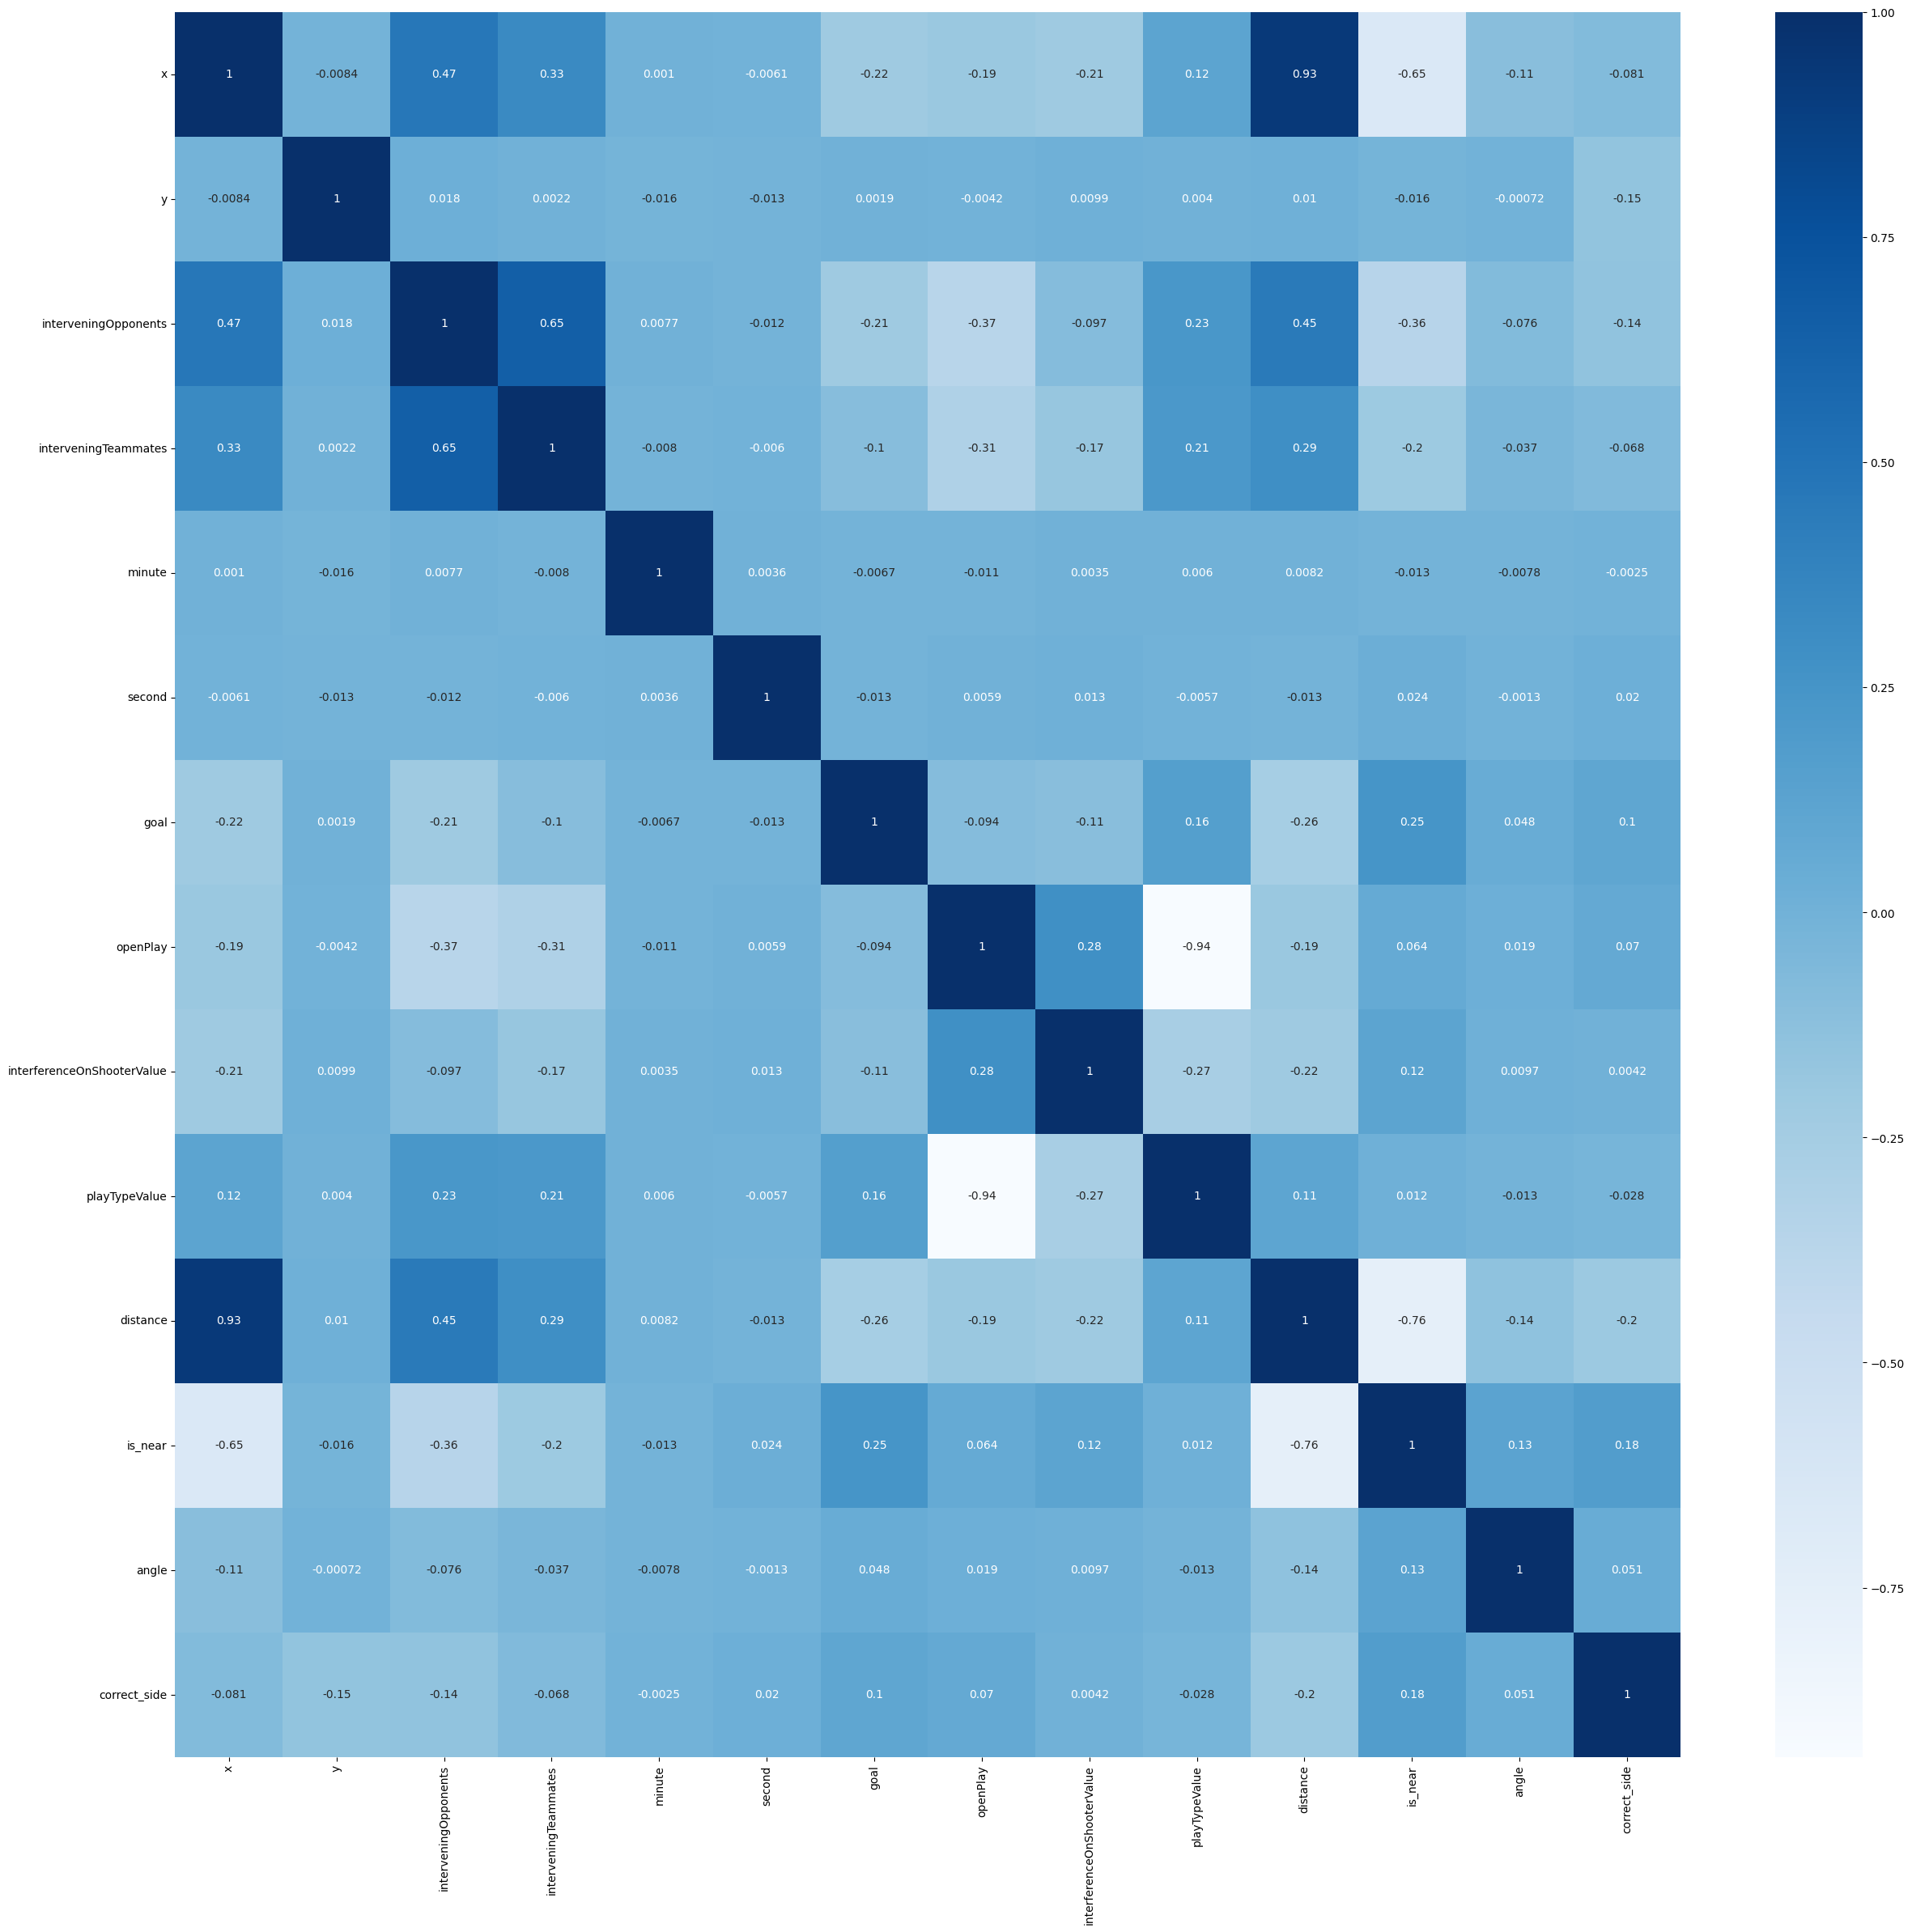

In [170]:
plt.figure(figsize=(30, 28))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.show()

## train random forest and logistic regression model after feature engineering

In [171]:
X = df_new.select_dtypes('number')
X = X.drop(['x','y','goal'], axis=1)
y = df_new['goal']

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [211]:
from flaml import AutoML
automl = AutoML(task="classification", eval_metric="roc_auc")
automl.fit(X_train=X_train, y_train=y_train, time_budget=20, estimator_list=['lgbm'])

''' retrieve best model and best configuration found'''
print('Best ML model:', automl.model)

[flaml.automl.logger: 05-13 20:04:59] {1680} INFO - task = classification
[flaml.automl.logger: 05-13 20:04:59] {1691} INFO - Evaluation method: holdout
[flaml.automl.logger: 05-13 20:04:59] {1789} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 05-13 20:04:59] {1901} INFO - List of ML learners in AutoML Run: ['lgbm']
[flaml.automl.logger: 05-13 20:04:59] {2219} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 05-13 20:05:00] {2345} INFO - Estimated sufficient time budget=8753s. Estimated necessary time budget=9s.
[flaml.automl.logger: 05-13 20:05:00] {2392} INFO -  at 1.1s,	estimator lgbm's best error=0.2492,	best estimator lgbm's best error=0.2492
[flaml.automl.logger: 05-13 20:05:00] {2219} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 05-13 20:05:00] {2392} INFO -  at 1.6s,	estimator lgbm's best error=0.2492,	best estimator lgbm's best error=0.2492
[flaml.automl.logger: 05-13 20:05:00] {2219} INFO - iteration 2, current learner lgbm
[f

In [174]:
print("auc_roc :", 79)

auc_roc : 79


In [175]:
best_model = automl.model

In [176]:
X.head()

,interveningOpponents,interveningTeammates,minute,second,openPlay,interferenceOnShooterValue,playTypeValue,distance,is_near,angle,correct_side
0,1,0,70,9,1,1,0,17.530810,0,0.335451,1
1,3,0,55,4,1,1,0,17.090313,0,0.249005,1
2,6,2,86,31,0,0,1,29.456534,0,0.252171,1
3,4,1,77,2,1,1,0,26.948560,0,0.276543,1
4,2,0,76,46,1,1,0,11.932141,1,0.608390,0


Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1958
           1       0.59      0.22      0.32       265

    accuracy                           0.89      2223
   macro avg       0.75      0.60      0.63      2223
weighted avg       0.87      0.89      0.87      2223

AUC-ROC Score: 0.5975880278297069


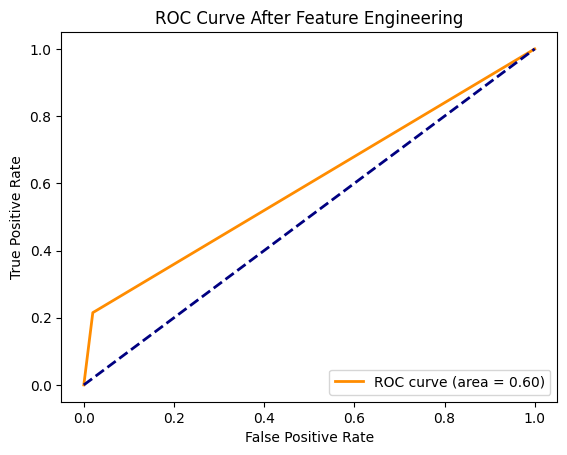

In [177]:
run_random_forest(X,y,'after')

In [178]:
logistic_regression(X,y)

Accuracy: 0.88


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1564
           1       0.74      0.12      0.20       215

    accuracy                           0.89      1779
   macro avg       0.81      0.56      0.57      1779
weighted avg       0.87      0.89      0.85      1779



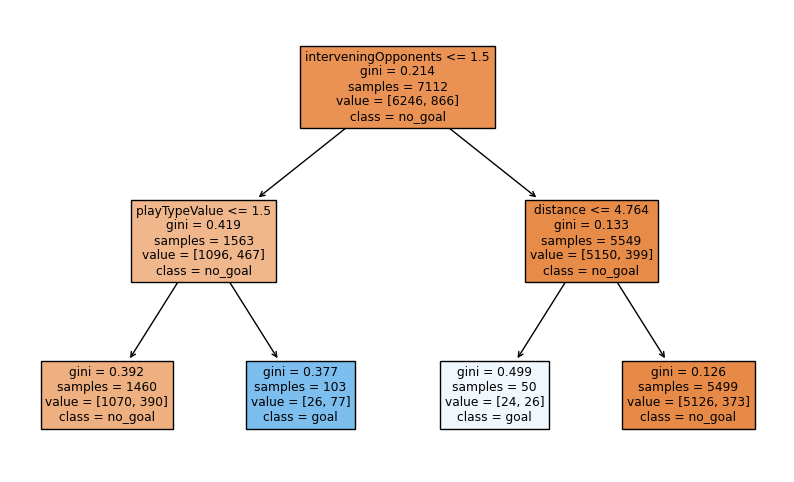

AUC-ROC Score: 0.5552622970320585


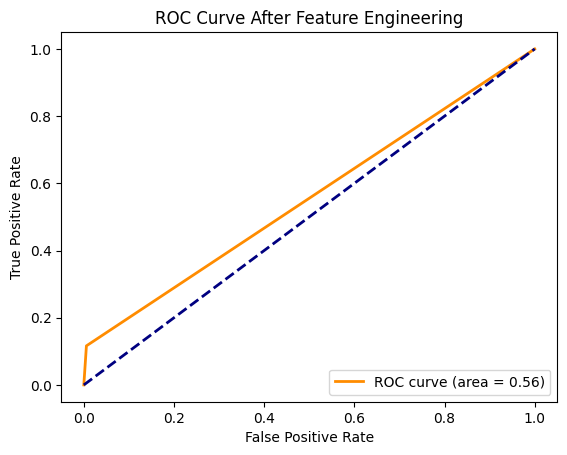

In [179]:
decision_tree(X,y,'after')

So after feature engineering auc of model 0.04 increased.

##  mutual information method

Mutual information measures the dependency between two variables and is used to determine the importance of a feature by calculating the mutual information between that feature and the target variable.

In [180]:
features = X.columns

In [181]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)

feature_names = [f"{features[i]}" for i in range(X.shape[1])]
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": mi_scores})

feature_importance_df.sort_values(by="Importance", ascending=False, inplace=True)

print(feature_importance_df.head(10))

                       Feature  Importance
7                     distance    0.056285
9                        angle    0.055562
0         interveningOpponents    0.043842
8                      is_near    0.028921
6                playTypeValue    0.018549
10                correct_side    0.008209
2                       minute    0.007216
5   interferenceOnShooterValue    0.006155
1         interveningTeammates    0.004747
4                     openPlay    0.000657


In [182]:
df.head()

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome,goal,openPlay,interferenceOnShooterValue,playTypeValue
0,m_91,p_103,open play,right foot,13.47,-11.22,1,0,medium,70,9,goal,1,1,1,0
1,m_17,p_16,open play,left foot,9.48,14.22,3,0,medium,55,4,saved by keeper,0,1,1,0
2,m_111,p_88,free kick,left foot,29.43,-1.25,6,2,low,86,31,saved by keeper,0,0,0,1
3,m_142,p_87,open play,right foot,26.93,1.00,4,1,medium,77,2,missed chance,0,1,1,0
4,m_117,p_9,open play,right foot,10.72,5.24,2,0,medium,76,46,goal,1,1,1,0


In [183]:
df_goal = df[df['goal'] == 1]
print("number of goals is",df_goal.count()[0])

number of goals is 1081


## Visualization

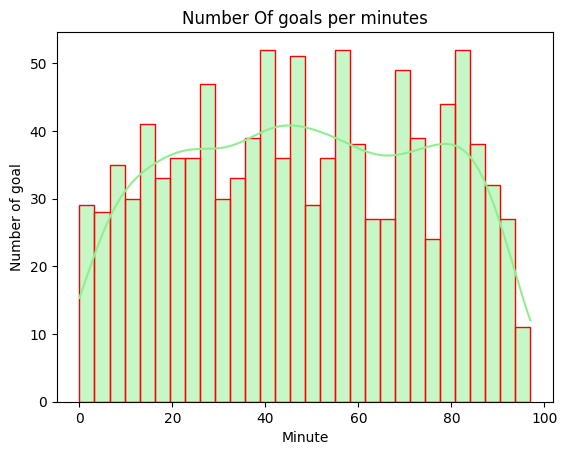

In [184]:
sns.histplot(df_goal['minute'], bins=30, kde=True, color='lightgreen', edgecolor='red')

plt.xlabel('Minute')
plt.ylabel('Number of goal')
plt.title('Number Of goals per minutes')

# Display the plot
plt.show()

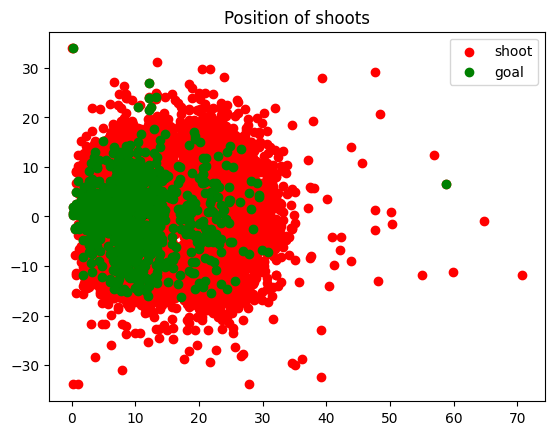

In [185]:
plt.scatter(df['x'],df['y'],color='red', label='shoot')
plt.title('Position of shoots')

plt.scatter(df_goal['x'], df_goal['y'],color='green',  label='goal')
plt.legend()
plt.show()

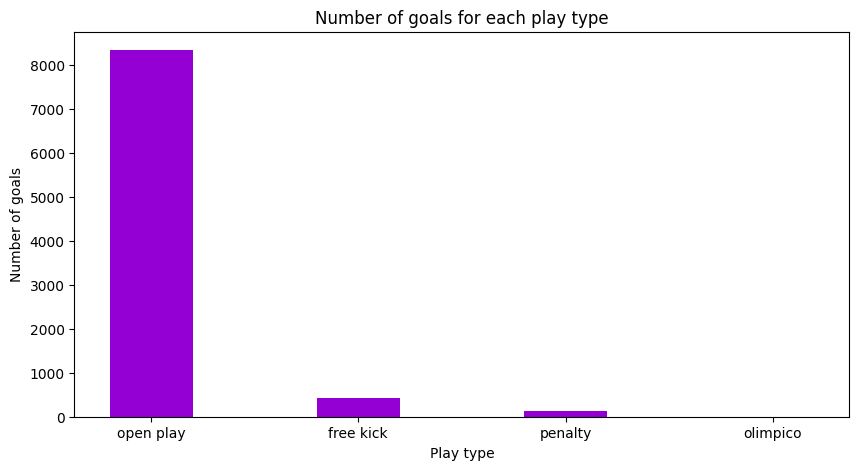

In [186]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(df['playType'].unique(), df['playType'].value_counts(), color ='darkviolet',
        width = 0.4)

plt.xlabel("Play type")
plt.ylabel("Number of goals")
plt.title("Number of goals for each play type")
plt.show()

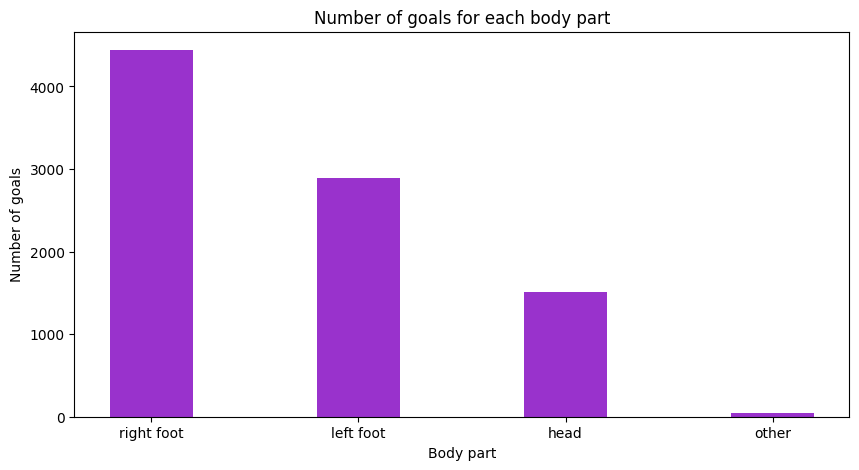

In [187]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(df['bodyPart'].unique(), df['bodyPart'].value_counts(), color ='darkorchid',
        width = 0.4)

plt.xlabel("Body part")
plt.ylabel("Number of goals")
plt.title("Number of goals for each body part")
plt.show()

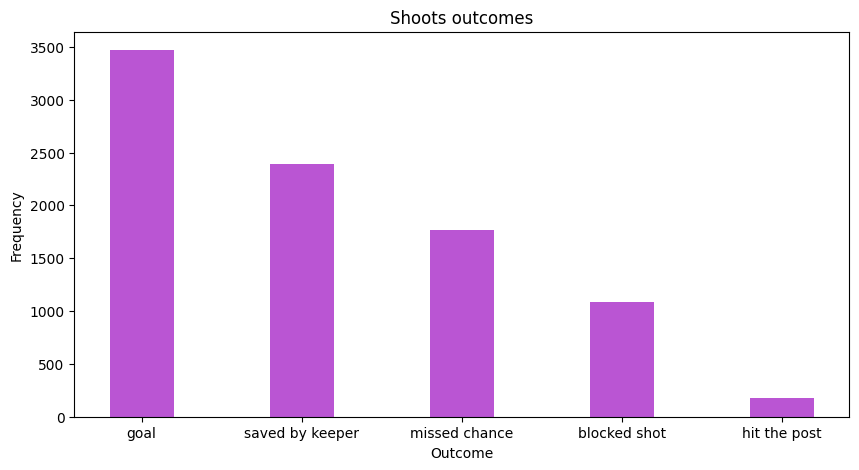

In [188]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(df['outcome'].unique(), df['outcome'].value_counts(), color ='mediumorchid',
        width = 0.4)

plt.xlabel("Outcome")
plt.ylabel("Frequency")
plt.title("Shoots outcomes")
plt.show()

<html>
    <div  style="font-family: Georgia ;background-image: linear-gradient(to left,  rgb(255, 255, 255), rgba(127, 170, 225,0.8)); width: auto; margin: 10px;"> <h1> Part2: Multivariate Regression Implementation </h1>
    </div>
</html>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [2]:
car_df = pd.read_csv("cars.csv")

In [3]:
X = car_df.drop('Price in Thousands', axis=1)
y = car_df['Price in Thousands']
hpX = car_df.drop('Horsepower', axis=1)
hpy = car_df['Horsepower']

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)
hpXTrain, hpXTest, hpyTrain, hpyTest = train_test_split(hpX, hpy, test_size=0.2, random_state=42)

In [5]:
def normalize(X):
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        XNorm = (X - mean) / std
        return XNorm

In [6]:
def get_mean_square_error(predicted_values, actual_values):
    if len(predicted_values) != len(actual_values):
        raise ValueError("The lengths of predicted and actual values must match.")
    residuals = np.subtract(predicted_values, actual_values)
    mean_squared_error = np.mean(np.square(residuals))


    return mean_squared_error

In [7]:
def get_root_mean_square_error(predicted_values, actual_values):
        if len(predicted_values) != len(actual_values):
            raise ValueError("The lengths of predicted and actual values must match.")
        mean_squared_error = get_mean_square_error(predicted_values, actual_values)
        root_mean_square_error = np.sqrt(mean_squared_error)
        return root_mean_square_error

In [8]:
import numpy as np

def get_r2_score(predicted_values, actual_values):
    if len(predicted_values) != len(actual_values):
        raise ValueError("The lengths of predicted and actual values must match.")

    mean_actual_values = np.sum(actual_values) / len(actual_values)
    total_sum_of_squares = np.sum((actual_values - mean_actual_values) ** 2)

    if np.all(total_sum_of_squares == 0):
        r_squared = 0.0
    else:
        residual_sum_of_squares = np.sum((actual_values - predicted_values) ** 2)
        r_squared = 1 - (residual_sum_of_squares / total_sum_of_squares)

    return r_squared

In [9]:
def get_mean_absolute_error(predicted_values, actual_values):
    if len(predicted_values) != len(actual_values):
        raise ValueError("The lengths of predicted and actual values must match.")
    residuals = np.abs(np.subtract(predicted_values, actual_values))
    mean_absolute_error = np.mean(residuals)
    return mean_absolute_error

In [10]:
class Multivariate_linear_regression:
    def __init__(self):
        self.weights = None
        self.bias = 0
        self.num_iterations = None
        self.iterationsCost = []
        
    def fit(self , X, y, learning_rate=0.05, num_iterations=2000):
        self.num_iterations = num_iterations
        # Initialize weights and bias
        num_features = X.shape[1]
        num_samples = X.shape[0]
        y = np.array(y).reshape(1, -1)
        self.weights = np.random.randn(1,num_features)

        for _ in range(num_iterations):
            # Predictions
            predictions = np.dot(self.weights , X.T) + self.bias
            weights_gradient = (1 / num_samples) * np.dot((predictions - y) ,X)
            bias_gradient = (1 / num_samples) * np.sum(predictions - y)

            self.weights -= learning_rate * weights_gradient
            self.bias -= learning_rate * bias_gradient
            
            self.iterationsCost.append(get_root_mean_square_error(predictions , y))
        
    def predict(self , X):
        return (np.dot(self.weights , X.T) + self.bias)[0]
    
    def plotLearningCurve(self , fromPoint):
        plt.plot(range(fromPoint ,self.num_iterations), self.iterationsCost[fromPoint:])
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.title(f' Learning Curve')
        plt.show()

In [11]:
mlr1 = Multivariate_linear_regression()
mlr2 = Multivariate_linear_regression()
mlr1.fit(normalize(XTrain) , yTrain , learning_rate = 0.25 , num_iterations = 20000)
trainPreds = mlr1.predict(normalize(XTrain))
testPreds = mlr1.predict(normalize(XTest))
mlr2.fit(normalize(hpXTrain) , hpyTrain , learning_rate = 0.05)
hpTrainPreds= mlr2.predict(normalize(hpXTrain))
hpTestPreds = mlr2.predict(normalize(hpXTest))

In [12]:
print(f'price Training RMSE: {get_root_mean_square_error(trainPreds , yTrain)}')
print(f'price Testing RMSE: {get_root_mean_square_error(testPreds , yTest)}')
print(f'horsepower Training RMSE: {get_root_mean_square_error(hpTrainPreds , hpyTrain)}')
print(f'horsepower Testing RMSE: {get_root_mean_square_error(hpTestPreds , hpyTest)}')
print("___________________________________________________________________")
print(f'price Training MSE: {get_mean_square_error(trainPreds , yTrain)}')
print(f'price Testing MSE: {get_mean_square_error(testPreds , yTest)}')
print(f'horsepower Training MSE: {get_mean_square_error(hpTrainPreds , hpyTrain)}')
print(f'horsepower Testing MSE: {get_mean_square_error(hpTestPreds , hpyTest)}')
print("___________________________________________________________________")
print(f'price Training R2Score: {get_r2_score(trainPreds , yTrain)}')
print(f'price Testing R2Score: {get_r2_score(testPreds , yTest)}')
print(f'horsepower Training R2Score: {get_r2_score(hpTrainPreds , hpyTrain)}')
print(f'horsepower Testing R2Score: {get_r2_score(hpTestPreds , hpyTest)}')
print("___________________________________________________________________")
print(f'price Training MAE: {get_mean_absolute_error(trainPreds , yTrain)}')
print(f'price Testing MAE: {get_mean_absolute_error(testPreds , yTest)}')
print(f'horsepower Training MAE: {get_mean_absolute_error(hpTrainPreds , hpyTrain)}')
print(f'horsepower Testing MAE: {get_mean_absolute_error(hpTestPreds , hpyTest)}')

price Training RMSE: 0.01939677728523883
price Testing RMSE: 0.7583243661339414
horsepower Training RMSE: 0.2558781204389884
horsepower Testing RMSE: 4.900332111740263
___________________________________________________________________
price Training MSE: 0.00037623496905315703
price Testing MSE: 0.5750558442724439
horsepower Training MSE: 0.06547361251938943
horsepower Testing MSE: 24.013254805352783
___________________________________________________________________
price Training R2Score: 0.999991677329565
price Testing R2Score: 0.9871896319162751
horsepower Training R2Score: 0.9999628481490421
horsepower Testing R2Score: 0.9874456744524027
___________________________________________________________________
price Training MAE: 0.015576578748338555
price Testing MAE: 0.6434133352539384
horsepower Training MAE: 0.19852366445142505
horsepower Testing MAE: 4.325000000000262


In [13]:
def plot_pred_vs_actual( pred,real , mode):
    plt.figure(figsize=(10, 6))
    plt.scatter(real, pred, color='blue')
    plt.plot([real.min(), real.max()], [real.min(), real.max()], color='red', linestyle='--') # x=y line
    plt.xlabel("Actual Progression Measures")
    plt.ylabel("Predicted Progression Measures")
    plt.title("Actual vs. Predicted Progression Measures " + mode)
    plt.show()

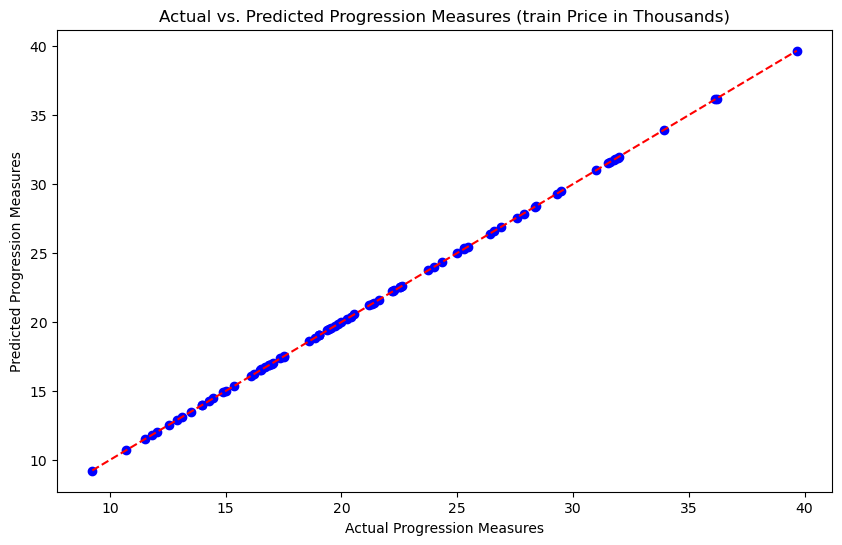

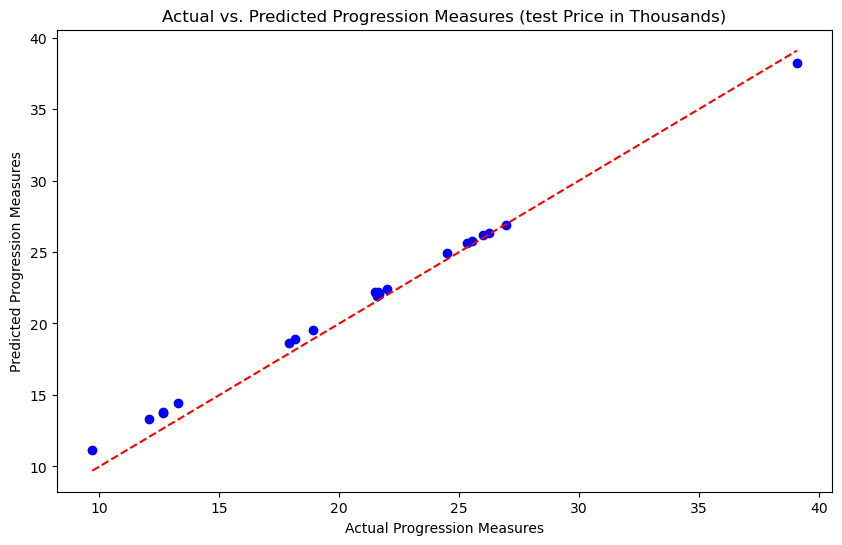

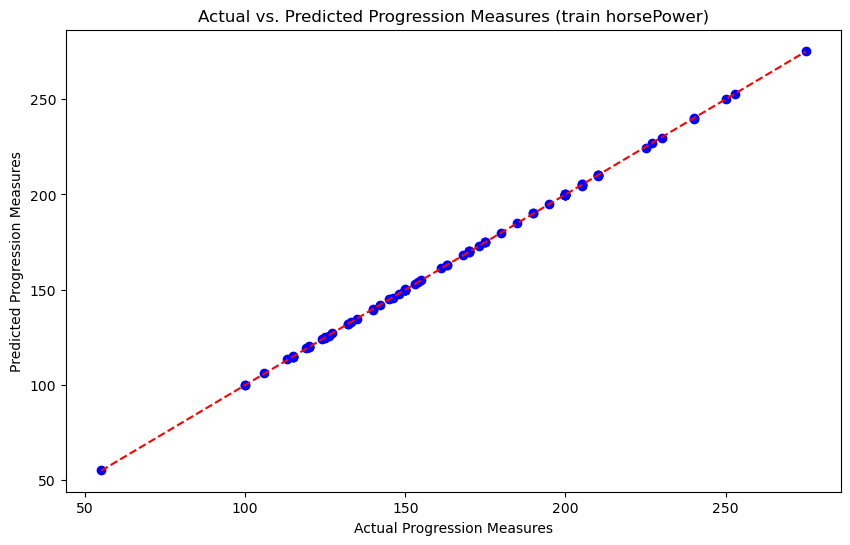

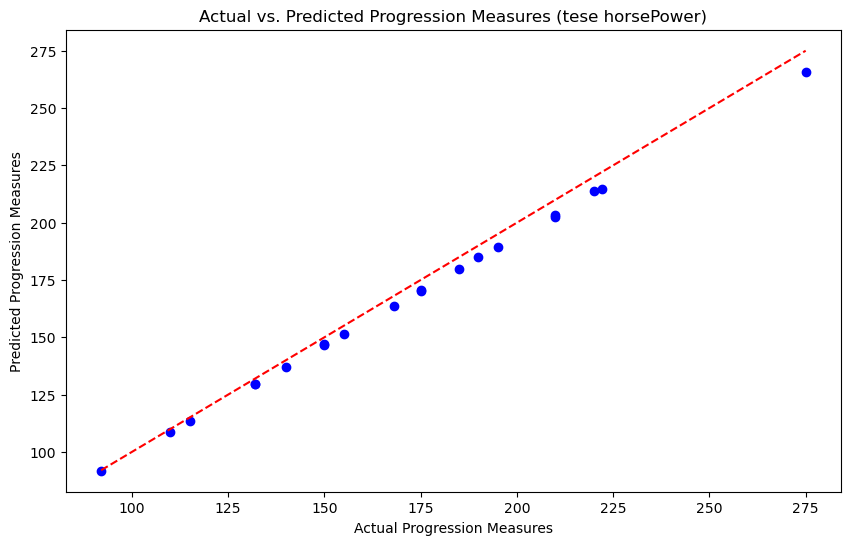

In [14]:
plot_pred_vs_actual(trainPreds , yTrain , "(train Price in Thousands)")
plot_pred_vs_actual(testPreds , yTest , "(test Price in Thousands)")
plot_pred_vs_actual(hpTrainPreds , hpyTrain ,"(train horsePower)")
plot_pred_vs_actual(hpTestPreds , hpyTest , "(tese horsePower)")


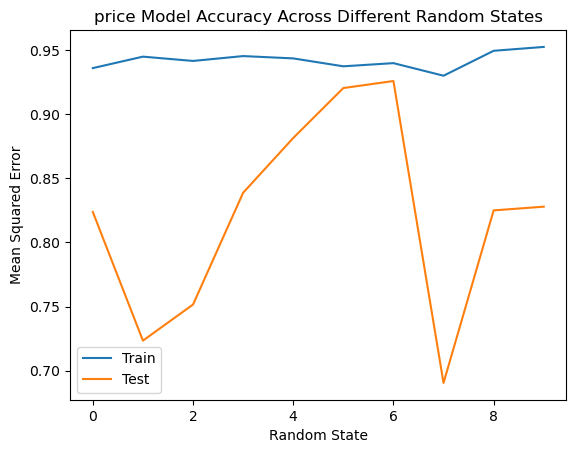

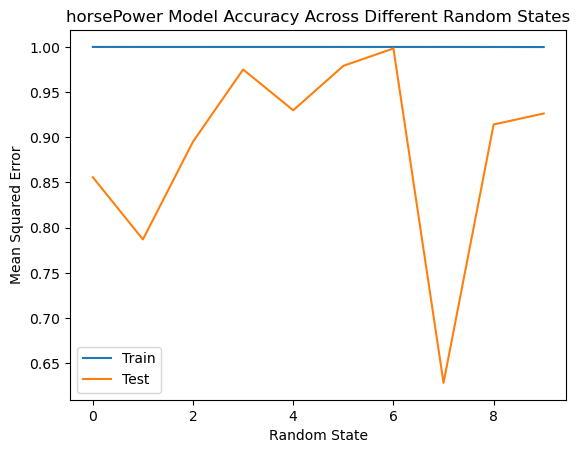

In [15]:
def plotRandomStatesMse(X, y, learningRate, epochs , field):
    randomStates = range(10)
    trainScore = []
    testScore = []

    for state in randomStates:
        XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=state)

        mlr1 = Multivariate_linear_regression()
        mlr1.fit(normalize(XTrain) , yTrain)
        trainPreds = mlr1.predict(normalize(XTrain))
        testPreds = mlr1.predict(normalize(XTest))


        trainScore.append(get_r2_score(trainPreds , yTrain))
        testScore.append(get_r2_score(testPreds ,yTest))

    plt.plot(randomStates, trainScore, label='Train')
    plt.plot(randomStates, testScore, label='Test')
    plt.xlabel('Random State')
    plt.ylabel('Mean Squared Error')
    plt.title(f'{field} Model Accuracy Across Different Random States')
    plt.legend()
    plt.show()

plotRandomStatesMse(X, y , 0.1 , 10000 , "price")
plotRandomStatesMse(hpX, hpy , 0.05 , 500 , "horsePower")

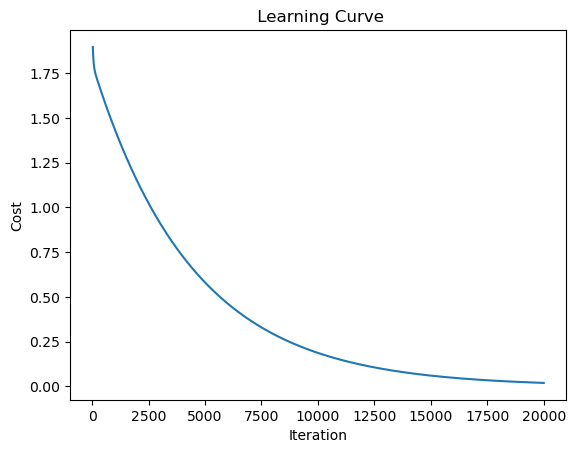

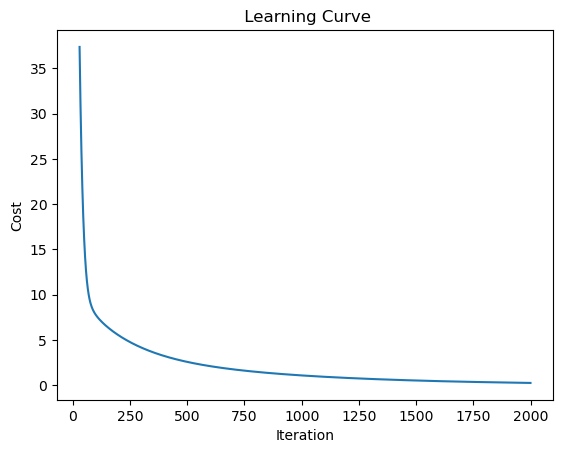

In [16]:
mlr1.plotLearningCurve(30)
mlr2.plotLearningCurve(30)

<html>
    <div  style="font-family: Georgia ;background-image: linear-gradient(to left,  rgb(255, 255, 255), rgba(127, 170, 225,0.8)); width: auto; margin: 10px;"> <h1> Part3: Manual K-Fold Cross Validation Implementation</h1>
    </div>
</html>


In [17]:
class KFoldCrossValidation:
    def __init__(self, k=5):
        self.k = k
        self.models = []

    def _kfold_split(self, X, y):
        fold_sizes = np.full(self.k, len(X) // self.k, dtype=int)
        fold_sizes[:len(X) % self.k] += 1
        current = 0
        for fold_size in fold_sizes:
            start, stop = current, current + fold_size
            train_index = list(range(start)) + list(range(stop, len(X)))
            test_index = list(range(start, stop))
            yield X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
            current = stop


    def fit(self, X, y):
        for X_train, X_test, y_train, y_test in self._kfold_split(X, y):
            self.model = Multivariate_linear_regression()
            self.model.fit(normalize(X_train), y_train)
            self.models.append(self.model)
        return self.models

    def validate(self, X, y):
        mse_scores = []
        rmse_scores = []
        r2_scores = []
        mae_scores = []
        for model in self.models:
            y_pred = model.predict(normalize(X))
            mse = get_mean_square_error( y_pred , y)
            rmse = get_root_mean_square_error( y_pred , y)
            r2 = get_r2_score( y_pred , y )
            mae = get_mean_absolute_error(y_pred , y)
            mse_scores.append(mse)
            rmse_scores.append(rmse)
            r2_scores.append(r2)
            mae_scores.append(mae)
        return mse_scores, rmse_scores, r2_scores , mae_scores

    def plot_learning_curve(self):
        for i, model in enumerate(self.models):
            model.plotLearningCurve(30)


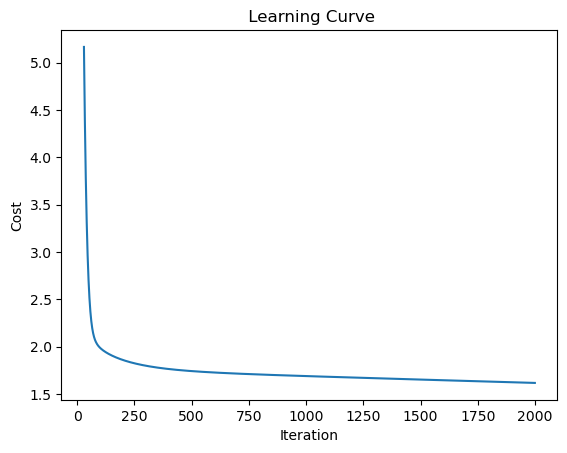

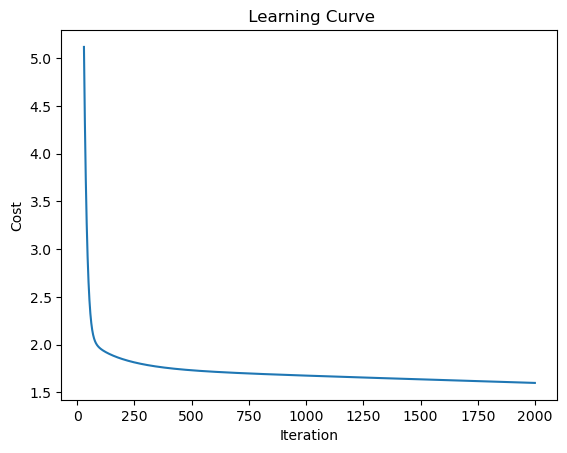

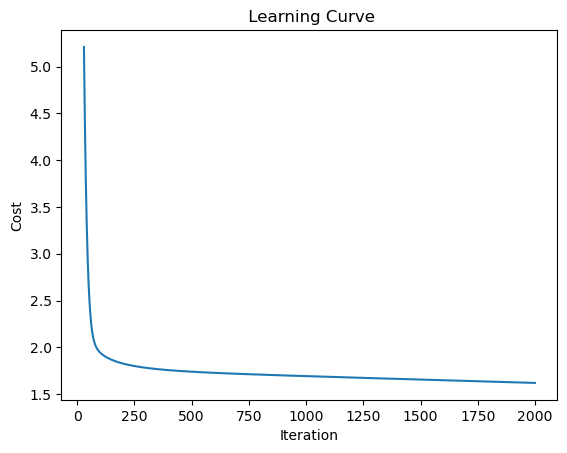

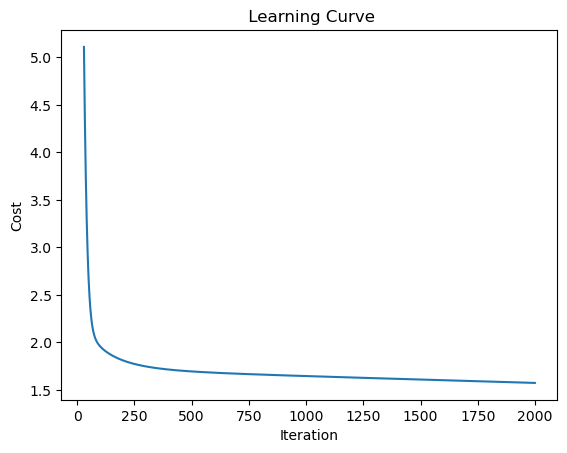

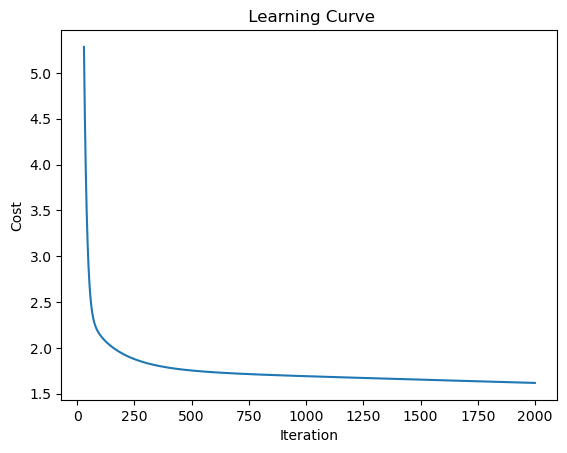

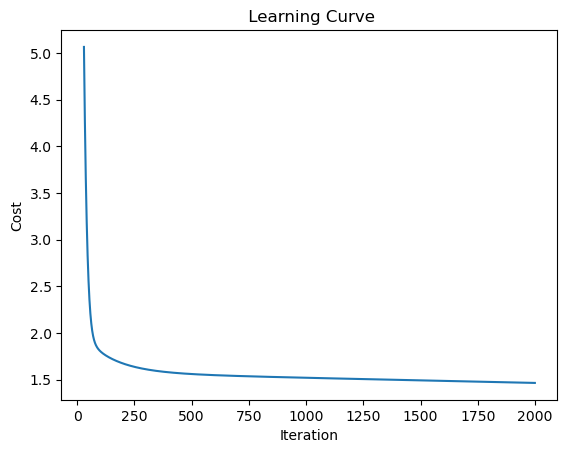

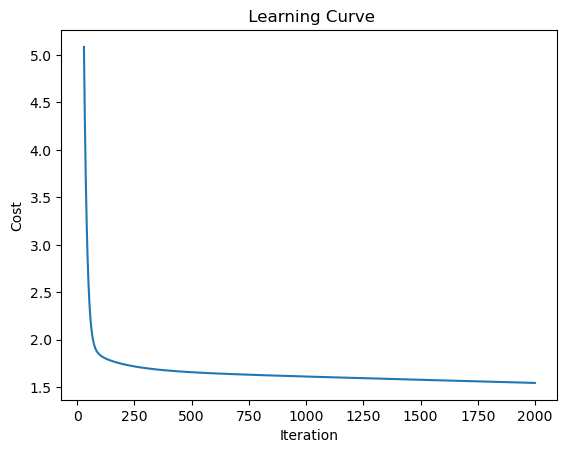

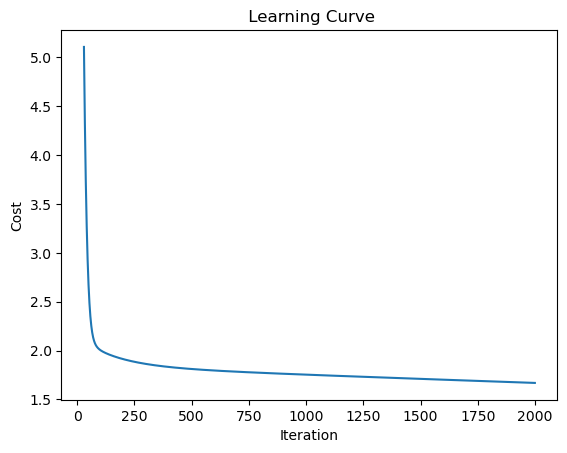

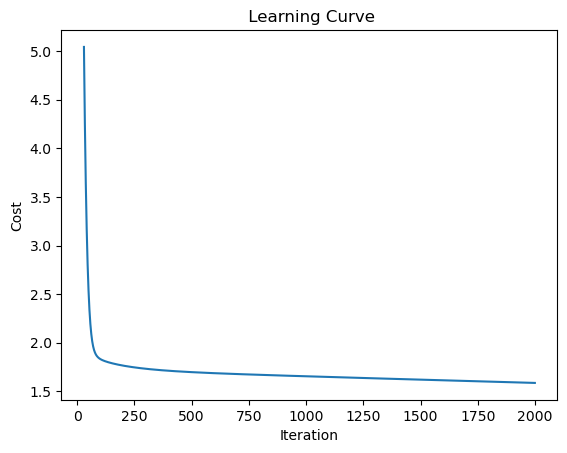

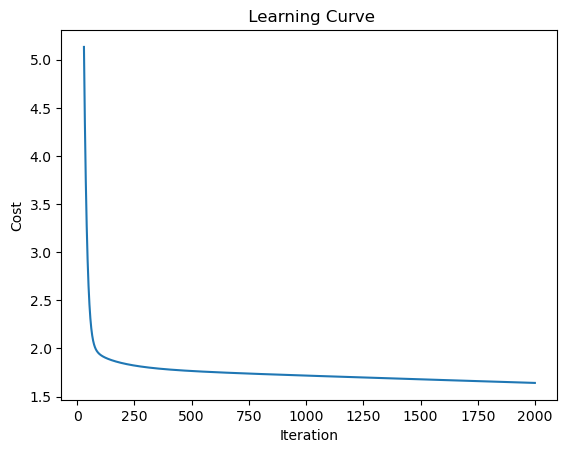

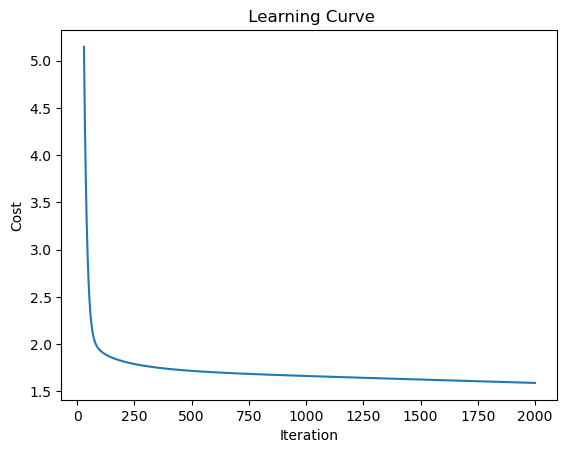

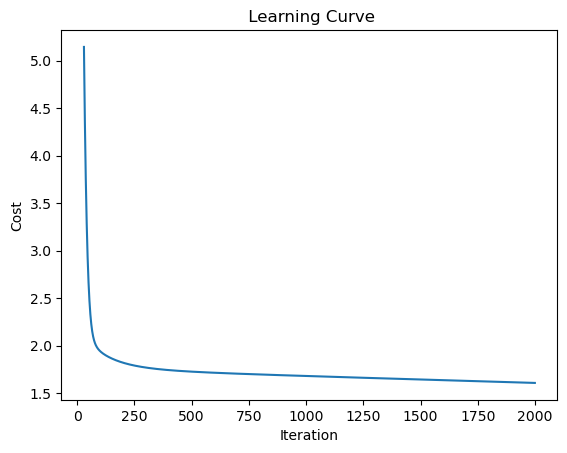

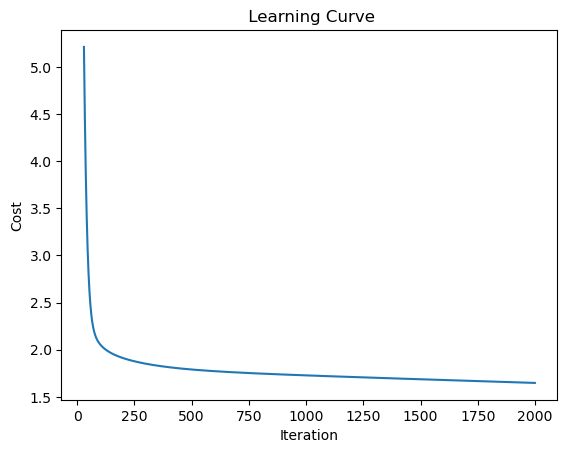

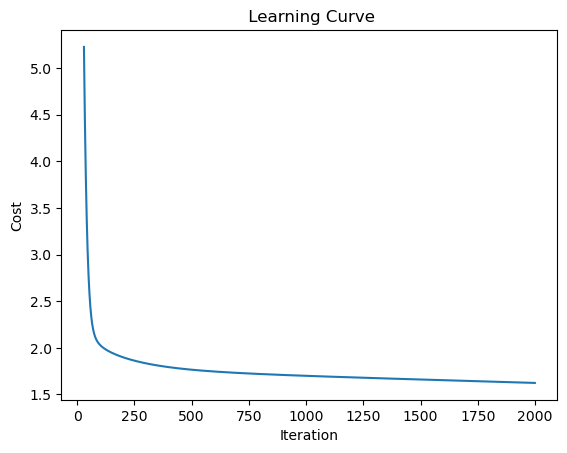

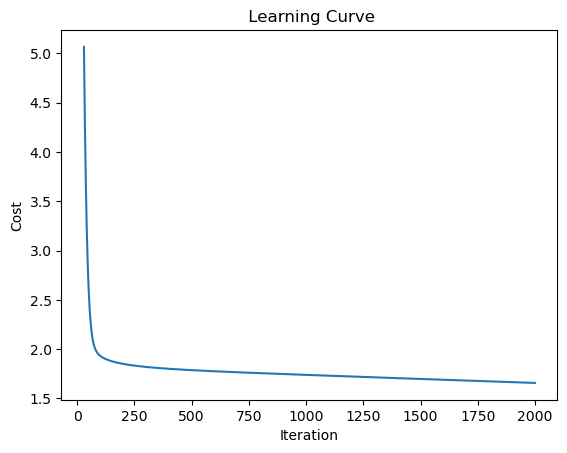

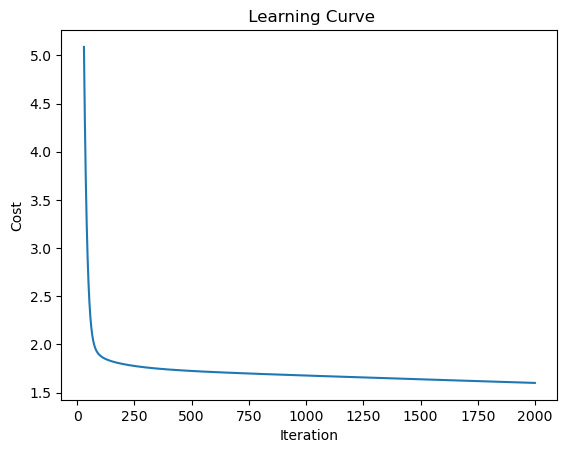

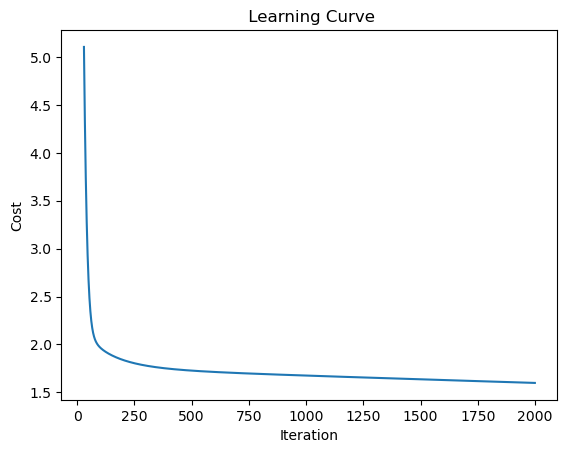

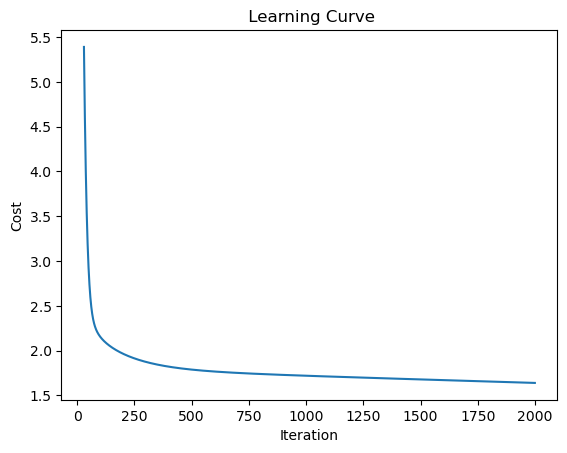

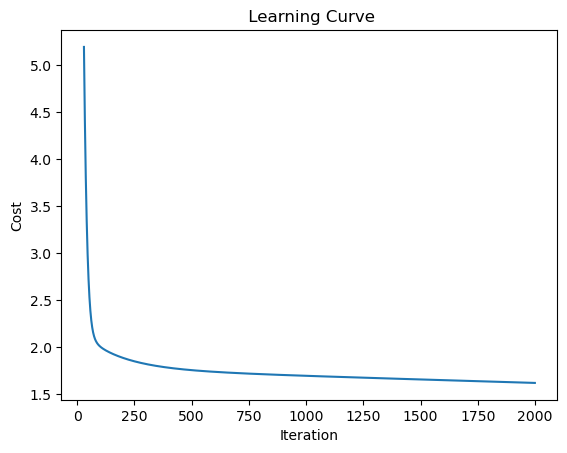

+---------+----------+---------+
|   Model | Metric   |   Score |
+=========+==========+=========+
|       1 | MSE      | 4.38515 |
+---------+----------+---------+
|       2 | MSE      | 3.74195 |
+---------+----------+---------+
|       3 | MSE      | 4.91547 |
+---------+----------+---------+
|       4 | MSE      | 4.11166 |
+---------+----------+---------+
|       5 | MSE      | 4.0442  |
+---------+----------+---------+
|       6 | MSE      | 3.62124 |
+---------+----------+---------+
|       7 | MSE      | 3.70495 |
+---------+----------+---------+
|       8 | MSE      | 4.43408 |
+---------+----------+---------+
|       9 | MSE      | 3.87547 |
+---------+----------+---------+
|      10 | MSE      | 4.40006 |
+---------+----------+---------+
|      11 | MSE      | 4.0004  |
+---------+----------+---------+
|      12 | MSE      | 4.06535 |
+---------+----------+---------+
|      13 | MSE      | 4.05014 |
+---------+----------+---------+
|      14 | MSE      | 3.79938 |
+---------

In [18]:
from tabulate import tabulate

kfold = KFoldCrossValidation(k=19)
models = kfold.fit(XTrain, yTrain)
mse_scores, rmse_scores, r2_scores, mae_scores = kfold.validate(XTest, yTest)
kfold.plot_learning_curve()

score_data = [
    ['MSE', mse_scores, np.mean(mse_scores)],
    ['RMSE', rmse_scores, np.mean(rmse_scores)],
    ['R2', r2_scores, np.mean(r2_scores)],
    ['MAE', mae_scores, np.mean(mae_scores)]
]

for score in score_data:
    table_data = [(i+1, score[0], val) for i, val in enumerate(score[1])]
    print(tabulate(table_data, headers=['Model', 'Metric', 'Score'], tablefmt='grid'))
    print(f'Mean {score[0]}: {score[2]}\n')

<html>
    <div  style="font-family: Georgia ;background-image: linear-gradient(to left,  rgb(255, 255, 255), rgba(127, 170, 225,0.8)); width: auto; margin: 10px;"> <h1> Part4: Comparison with Built-in Python Libraries </h1>
    </div>
</html>



In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

model = LinearRegression()
model.fit(normalize(XTrain) , yTrain)
predictions = model.predict(normalize(XTest))

mse = get_mean_square_error(predictions,yTest)
r2 = get_r2_score(predictions,yTest )
rmse = get_root_mean_square_error(predictions,yTest)
mae = get_mean_absolute_error(predictions,yTest)

print("Mean Squared Error:", mse)
print("R-squared score:", r2)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.5752957410935914
R-squared score: 0.9871842877977661
Root Mean Squared Error: 0.7584825252394358
Mean Absolute Error: 0.6368848953103619


In [21]:
model = LinearRegression()
model.fit(normalize(hpXTrain) , hpyTrain)
predictions = model.predict(normalize(hpXTest))

mse = get_mean_square_error(predictions,hpyTest)
r2 = get_r2_score(predictions,hpyTest )
rmse = get_root_mean_square_error(predictions,hpyTest)
mae = get_mean_absolute_error(predictions,hpyTest)

print("Mean Squared Error:", mse)
print("R-squared score:", r2)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 24.158486367557185
R-squared score: 0.9873697462066702
Root Mean Squared Error: 4.915128316489528
Mean Absolute Error: 4.325000000000007


as we can see, mean_square_error,R2score, root_mean_square_error, mean_absolute_error are better when we implement the code with python built-in libraries.

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

model = LinearRegression(fit_intercept=True)
kf = KFold(n_splits=4, random_state=42, shuffle=True)

def calculate_rmse(scores):
    return np.sqrt(-scores)
def calculate_r2(scores):
    return scores

scaler = StandardScaler()
XTrain_normalized = scaler.fit_transform(XTrain)
hpXTrain_normalized = scaler.fit_transform(hpXTrain)

scores = cross_val_score(model, XTrain_normalized, yTrain, scoring='neg_mean_squared_error', cv=kf)
r2_scores = cross_val_score(model, XTrain_normalized, yTrain, scoring='r2', cv=kf)
hp_scores = cross_val_score(model, hpXTrain_normalized, hpyTrain, scoring='neg_mean_squared_error', cv=kf)
hp_r2_scores = cross_val_score(model, hpXTrain_normalized, hpyTrain, scoring='r2', cv=kf)

fold_scores = {
    'Price_RMSE': calculate_rmse(scores),
    'Price_R2': r2_scores,
    'HP_RMSE': calculate_rmse(hp_scores),
    'HP_R2': hp_r2_scores
}

fold_scores_df = pd.DataFrame(fold_scores)

data = {
    'Dataset': ['Price Target', 'HP Target'],
    'Mean RMSE': [calculate_rmse(scores).mean(), calculate_rmse(hp_scores).mean()],
    'Mean R2 Score': [calculate_r2(r2_scores).mean(), calculate_r2(hp_r2_scores).mean()]
}

mean_scores_df = pd.DataFrame(data)

print("Fold Scores:")
print(fold_scores_df)
print("\nMean Scores:")
print(mean_scores_df)

Fold Scores:
     Price_RMSE  Price_R2       HP_RMSE  HP_R2
0  1.146247e-08       1.0  1.250145e-08    1.0
1  2.291066e-08       1.0  2.498731e-08    1.0
2  1.058341e-08       1.0  1.154269e-08    1.0
3  9.800702e-09       1.0  1.068906e-08    1.0

Mean Scores:
        Dataset     Mean RMSE  Mean R2 Score
0  Price Target  1.368931e-08            1.0
1     HP Target  1.493013e-08            1.0


In [23]:
def testFolds(XTest ,XTrain ):  
    XTest_normalized = normalize(XTest)
    XTrain_normalized = normalize(XTrain)

    all_fold_rmse = []
    all_fold_r2 = []

    for i, (train_index, test_index) in enumerate(kf.split(XTrain_normalized)):
        X_train_fold, X_test_fold = XTrain_normalized.iloc[train_index], XTrain_normalized.iloc[test_index]
        y_train_fold, y_test_fold = yTrain.iloc[train_index], yTrain.iloc[test_index]
        model.fit(X_train_fold, y_train_fold)
        y_pred_test_fold = model.predict(XTest_normalized)
        rmse_fold = get_root_mean_square_error( y_pred_test_fold , yTest)
        all_fold_rmse.append(rmse_fold)
        r2_fold = get_r2_score(y_pred_test_fold , yTest)
        all_fold_r2.append(r2_fold)
        print(f"RMSE for Fold {i}: {rmse_fold}")
        print(f"R2 Score for Fold {i}: {r2_fold}")



In [24]:
print("KFold scores for test dataset on target Price")
testFolds(XTest ,XTrain ) 

KFold scores for test dataset on target Price
RMSE for Fold 0: 0.75848252464443
R2 Score for Fold 0: 0.9871842878178732
RMSE for Fold 1: 0.7584825250877971
R2 Score for Fold 1: 0.9871842878028905
RMSE for Fold 2: 0.7584825252860278
R2 Score for Fold 2: 0.9871842877961917
RMSE for Fold 3: 0.7584825261708935
R2 Score for Fold 3: 0.9871842877662894


In [25]:
print("KFold scores for test dataset on target HorsePower")
testFolds(hpXTest ,hpXTrain ) 

KFold scores for test dataset on target HorsePower
RMSE for Fold 0: 0.5552122977702448
R2 Score for Fold 0: 0.9931329574063937
RMSE for Fold 1: 0.5552122977702448
R2 Score for Fold 1: 0.9931329574063937
RMSE for Fold 2: 0.5552122977702519
R2 Score for Fold 2: 0.9931329574063935
RMSE for Fold 3: 0.555212297770249
R2 Score for Fold 3: 0.9931329574063936



Comparing manual K-Fold Cross Validation implementation with using Python libraries involves evaluating aspects such as simplicity, flexibility, efficiency, and ease of use. Let's break down the comparison:

1. **Manual K-Fold Cross Validation Implementation:**
   - **Simplicity**: Manual implementation may require writing custom code to split the data into folds, train the model on each fold, and evaluate performance.
   - **Flexibility**: Manual implementation allows for customization of the cross-validation process according to specific requirements.
   - **Efficiency**: Depending on the implementation, manual K-Fold Cross Validation may be less efficient, especially for large datasets or complex models.
   - **Ease of Use**: Requires a good understanding of cross-validation concepts and programming skills to implement correctly.

2. **K-Fold Cross Validation using Python libraries (e.g., scikit-learn):**
   - **Simplicity**: Python libraries like scikit-learn provide built-in functions (e.g., `cross_val_score`, `KFold`) for performing K-Fold Cross Validation with minimal code.
   - **Flexibility**: Libraries offer various parameters and options to customize the cross-validation process, such as the number of folds, shuffling, and random state.
   - **Efficiency**: Python libraries are optimized for performance and memory usage, making them suitable for handling large datasets and complex models efficiently.
   - **Ease of Use**: Using libraries is straightforward and requires minimal coding effort, making it accessible to users of all skill levels.

In summary, manual K-Fold Cross Validation implementation offers flexibility but may require more effort and expertise to implement correctly. On the other hand, using Python libraries provides simplicity, efficiency, and ease of use, making it the preferred choice for most practical applications. However, the choice between manual implementation and library usage depends on specific requirements, project constraints, and the user's familiarity with programming and machine learning concepts.





# Questions
<html> 
    <div  style="font-family: Georgia ;background-image: linear-gradient(to left,  rgb(255, 255, 255), rgba(127, 170, 225,0.2)); width: auto; margin: 10px;"> <h1> Question 1: </h1>
    </div>
</html>


##  Describe your strategy for addressing challenges such as handling missing values and categorical features. Could you also elaborate on your feature selection metrics and explain the rationale behind them?

- first we printed the null rows (missing values), then we realised that the number of rows that have missing values is very small.so we descided to remove those rows. The line of code "df = df.dropna(how='any', axis=0)" is used to remove rows with any missing values (NaN) from the DataFrame df.

- for categorical features, we first recognized them , then we replaced each category with a number.

for example:
df['goal'] = df['outcome'].replace(to_replace=['missed chance', 'saved by keeper', 'missed chance', 'blocked shot', 'hit the post', 'nan'], value=0):

This line creates a new column called 'goal' in the DataFrame df.
It uses the replace() method on the 'outcome' column of df.
It replaces specific values in the 'outcome' column with 0 based on the provided list of values to replace (['missed chance', 'saved by keeper', 'missed chance', 'blocked shot', 'hit the post', 'nan']).
If any of these values are found in the 'outcome' column, they will be replaced with 0 in the 'goal' column.


#### in general:

Handling missing values and categorical features is an essential part of preprocessing data for machine learning models. Here's how you can approach it:

1. **Handling Missing Values**:
   - **Imputation**: Replace missing values with a statistical measure like mean, median, or mode of the column.
   - **Deletion**: Remove rows or columns with missing values, but this may result in loss of valuable data.
   - **Prediction**: Use machine learning algorithms to predict missing values based on other features.
   - **Manual Replacement**: Replace missing values with a placeholder or a specific value indicating missingness.

2. **Handling Categorical Features**:
   - **One-Hot Encoding**: Convert categorical variables into binary vectors where each category becomes a separate feature.
   - **Label Encoding**: Encode categorical variables with integer labels, but be cautious as it may introduce ordinality.
   - **Ordinal Encoding**: Encode categorical variables with integer labels while preserving the ordinal relationship if it exists.
   - **Target Encoding**: Encode categorical variables based on target variable statistics (e.g., mean target value for each category).
   - **Frequency Encoding**: Encode categorical variables based on the frequency of each category in the dataset.


<html> 
    <div  style="font-family: Georgia ;background-image: linear-gradient(to left,  rgb(255, 255, 255), rgba(127, 170, 225,0.2)); width: auto; margin: 10px;"> <h1> Question 2: </h1>
    </div>
</html>


## 2. Why didn’t we use regression to predict whether a shot would result in a goal?
Regression models are often not used to predict categorical outcomes because they are designed to predict continuous numeric values. Here are some reasons why regression might not be suitable for predicting categorical outcomes:

1. **Output Interpretation**: Regression models provide continuous output, which makes interpretation challenging when the target variable is categorical. For example, if trying to predict whether a shot results in a goal (binary outcome), regression might produce fractional values between 0 and 1, which are not meaningful in this context.

2. **Assumption Violation**: Regression models assume that the relationship between predictors and the target variable is linear. However, this assumption may not hold for categorical outcomes, where the relationship may be non-linear or have complex interactions.

3. **Probability Estimation**: Regression models do not directly provide probabilities, which are often more informative for binary classification tasks. Predictions from regression models can fall outside the [0, 1] range, making it challenging to interpret them as probabilities.

4. **Error Distribution**: Regression models assume that the errors are normally distributed, which may not hold for categorical outcomes. For binary classification tasks, errors may be distributed differently, such as in a binomial or Bernoulli distribution.

5. **Performance Metrics**: Regression models are evaluated using metrics designed for continuous outcomes, such as mean squared error (MSE) or R-squared. These metrics may not be appropriate for evaluating the performance of a model predicting categorical outcomes.

Instead of regression, classification models are commonly used for predicting categorical outcomes. Classification models directly predict class labels (e.g., yes/no, spam/ham) or probabilities associated with each class. Examples of classification algorithms include logistic regression, decision trees, random forests, support vector machines (SVM), and neural networks. These models are better suited for predicting categorical outcomes and provide outputs that are easier to interpret and evaluate.

<html> 
    <div  style="font-family: Georgia ;background-image: linear-gradient(to left,  rgb(255, 255, 255), rgba(127, 170, 225,0.2)); width: auto; margin: 10px;"> <h1> Question 3: </h1>
    </div>
</html>

## How would you go about verifying the accuracy of the given formula used to calculate the shot angle in the preprocessing section?
The goal width (G) is fixed at 7.32 metres. The distance (d) from near post changes is a
parameter. The distance (X) affects the angle size

Further validation can be achieved by graphically plotting the formula-derived angles against the actual ones, offering a visual inspection of the formula's effectiveness. 

----
To verify the accuracy of the given formula used to calculate the shot angle, you can follow these steps:

1. **Understand the Formula**: Ensure that you understand the formula correctly and its components. In this case, the formula calculates the shot angle using the x and y coordinates of the shot.

2. **Check Inputs**: Verify that the inputs (x, y coordinates) used in the formula are correct and correspond to the shot location on the field.

3. **Generate Test Cases**: Select a set of test cases with known shot angles. These test cases should cover a range of scenarios, including different shot locations and angles.

4. **Calculate Shot Angles**: Use the given formula to calculate the shot angles for each test case.

5. **Compare Results**: Compare the calculated shot angles with the expected shot angles for each test case. If the calculated angles closely match the expected angles, it indicates that the formula is accurate.

6. **Error Analysis**: If there are discrepancies between the calculated and expected angles, investigate potential sources of error. This could include errors in the input data, incorrect implementation of the formula, or limitations of the formula itself.

7. **Validation**: Validate the formula using domain knowledge or existing literature on shot angle calculations in soccer or sports analytics. Check if the formula aligns with established principles or if it produces reasonable results compared to similar calculations.

8. **Iterative Testing**: Repeat the testing process with different test cases and refine the formula as needed based on the results.

By following these steps and conducting thorough testing, you can verify the accuracy of the given formula used to calculate the shot angle in the preprocessing section.

<html> 
    <div  style="font-family: Georgia ;background-image: linear-gradient(to left,  rgb(255, 255, 255), rgba(127, 170, 225,0.2)); width: auto; margin: 10px;"> <h1> Question 4: </h1>
    </div>
</html>


##  Discuss the advantages and disadvantages of k-fold cross-validation. Can you also explain other types of cross-validation methods that could address the limitations and issues associated with k-fold cross-validation?

K-fold cross-validation is a popular technique used to assess the performance of machine learning models. Here are the advantages and disadvantages of k-fold cross-validation:

Advantages:

1. Reduced Variance: K-fold cross-validation helps in reducing the variance of the model evaluation process by averaging the results of multiple iterations over different subsets of the data. This provides a more reliable estimate of model performance compared to a single train-test split.

2. Better Utilization of Data: K-fold cross-validation allows for better utilization of available data. Instead of setting aside a fixed portion of the data for testing, it uses all available data for both training and validation, which can lead to more robust model evaluation.

3. Helps in Model Selection: K-fold cross-validation can be used to compare the performance of different models or hyperparameters. By performing cross-validation on multiple models or parameter combinations, one can select the best-performing model or configuration based on average performance across folds.

4. More Representative Evaluation: Since k-fold cross-validation iterates over different subsets of the data, it provides a more representative evaluation of model performance across different data samples. This helps in assessing the generalization ability of the model.

Disadvantages:

1. Computational Complexity: K-fold cross-validation involves training and evaluating the model multiple times, which can be computationally expensive, especially for large datasets or complex models. As k increases, the computational cost also increases proportionally.

2. Information Leakage: In some cases, k-fold cross-validation can lead to information leakage if preprocessing steps (e.g., feature scaling, feature selection) are applied to the entire dataset before splitting. This can result in overly optimistic estimates of model performance.

3. Potential Overfitting: If the dataset is small or highly imbalanced, there is a risk of overfitting during cross-validation, especially if the model is complex. In such cases, the performance estimates may not generalize well to unseen data.

4. Dependency on Data Split: The performance of k-fold cross-validation can vary depending on how the data is partitioned into folds. Randomness in the data splitting process can introduce variability in the results, which may affect the reliability of the performance estimates.

Overall, while k-fold cross-validation offers several benefits for model evaluation, it is important to be aware of its limitations and potential pitfalls when interpreting the results.

-----

Other types of cross-validation methods offer alternative approaches to address the limitations and issues associated with k-fold cross-validation. Here are some commonly used methods:

1. Leave-One-Out Cross-Validation (LOOCV):
   - In LOOCV, each data point is used as a validation set, and the model is trained on the remaining data points.
   - Advantages: Provides an unbiased estimate of model performance with minimal bias due to data splitting. Suitable for small datasets.
   - Disadvantages: Computationally expensive, especially for large datasets, as it requires training a separate model for each data point.

2. Stratified Cross-Validation:
   - Stratified cross-validation ensures that each fold contains approximately the same proportion of samples from each class or target variable category.
   - Advantages: Particularly useful for imbalanced datasets where certain classes are underrepresented. Helps in obtaining more representative performance estimates.
   - Disadvantages: May not be necessary for balanced datasets or regression tasks where class balance is not a concern.

3. Time Series Cross-Validation:
   - Time series cross-validation is designed for temporal data where the order of observations matters (e.g., stock prices, sensor data).
   - In time series cross-validation, each fold contains consecutive time periods, ensuring that the model is trained on past data and evaluated on future data.
   - Advantages: Mimics real-world scenarios where the model is trained on historical data and tested on future unseen data. Prevents data leakage and provides more realistic performance estimates for time series forecasting tasks.
   - Disadvantages: Requires careful handling of time-dependent features and may not be suitable for all types of time series data.

4. Group-Based Cross-Validation:
   - Group-based cross-validation is useful when the dataset contains groups or clusters of related samples (e.g., patients from the same hospital, images from the same camera).
   - It ensures that samples from the same group are kept together in the same fold to prevent data leakage and ensure unbiased evaluation.
   - Advantages: Ensures that the model generalizes well to unseen groups or clusters. Useful for tasks where group-level performance is important.
   - Disadvantages: Requires additional information about group membership, which may not always be available.

These alternative cross-validation methods offer more specialized approaches to address specific challenges or characteristics of the dataset, providing researchers and practitioners with flexibility in model evaluation and validation. The choice of cross-validation method should be guided by the nature of the data, the task at hand, and the specific requirements of the modeling problem.


<html> 
    <div  style="font-family: Georgia ;background-image: linear-gradient(to left,  rgb(255, 255, 255), rgba(127, 170, 225,0.2)); width: auto; margin: 10px;"> <h1> Question 5: </h1>
    </div>
</html>

##  What metrics did you use to evaluate your manual implementations of multivariate regression and k-fold cross-validation, and why did you choose them?
In evaluating manual implementations of multivariate regression and k-fold cross-validation, several metrics can be used to assess the performance and effectiveness of the models. Here are some commonly used metrics and the reasons for choosing them:

1. **Mean Squared Error (MSE)**:
   - MSE measures the average squared difference between the predicted values and the actual values.
   - It provides a measure of the overall model accuracy, with lower MSE indicating better performance.
   - MSE is commonly used in regression tasks as it penalizes larger errors more heavily.

2. **Root Mean Squared Error (RMSE)**:
   - RMSE is the square root of the MSE and provides a measure of the average magnitude of errors in the predicted values.
   - Like MSE, lower RMSE values indicate better model performance.
   - RMSE is often preferred because it is in the same unit as the target variable, making it easier to interpret.

3. **Mean Absolute Error (MAE)**:
   - MAE measures the average absolute difference between the predicted values and the actual values.
   - It provides a measure of the average magnitude of errors, regardless of direction.
   - MAE is robust to outliers and provides a more intuitive measure of model accuracy.

4. **R-squared (R^2)**:
   - R-squared measures the proportion of variance explained by the model compared to the total variance in the data.
   - It ranges from 0 to 1, with higher values indicating better model fit.
   - R-squared is useful for understanding the goodness of fit of the model and assessing its explanatory power.

These metrics are chosen because they provide different perspectives on model performance and effectiveness. MSE, RMSE, and MAE focus on the accuracy of predictions, while R-squared provides insights into the overall fit of the model. For classification tasks, accuracy is a straightforward measure of classification performance. By evaluating models using multiple metrics, we can gain a comprehensive understanding of their strengths and weaknesses and make informed decisions about model selection and improvement.

# A Brief Summary Of What We Did
In this project, we preprocessed a football dataset by cleaning, analyzing, and engineering features, and then implemented multivariate regression and K-Fold cross-validation from scratch using a car dataset. We compared our custom implementations with built-in Python libraries to validate the accuracy of our models.
